#  First Colab Tuning (İf  using)


In [0]:
# Control for directory
!ls

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import sys
sys.path.insert(0, 'drive/app')

In [0]:
import os
os.chdir("drive/app")

In [6]:
!ls

128out.csv     5.1-introduction-to-convnets.ipynb	    images.png
16out.csv      64out.csv				    simplenet_relu.h5
1.png	       C_Algoritihms_Comparison			    Untitled1.ipynb
32out.csv      deneme.py
32out.csv.ods  Image_Classifier_Algorithms_Comparing.ipynb


# Contents
- Starting
- Description Data
- Classic Machine Learning applications
    
    - Logistic Regression
    - SVM
    
- Deep & Neural Network
    
    - Multilayer Perceptron
    - Deep  Neural Networks
    - Convolutional Nueral Networks
    - Convolutional Nueral Networks with data augmentation
- Advanced Models
    - SimleNetV1
    - Resnet
    

## Starting - Main Idea

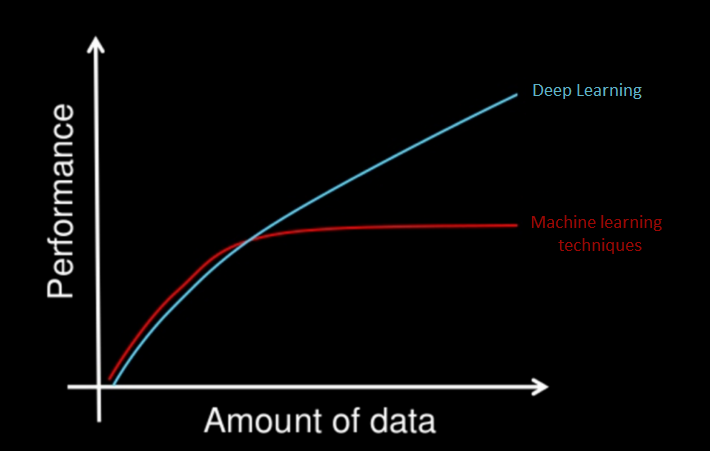

In [122]:
from IPython.display import Image
Image("1.png")

**Reference** :
-  http://cs229.stanford.edu/materials/CS229-DeepLearning.pdf

In [0]:
# Common Libraries
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

## Description Data

**Reference**:
- http://scikit-learn.org/stable/datasets/labeled_faces.html

In [124]:
face=fetch_lfw_people(min_faces_per_person=80)
print(face.data.shape)
print(face.target_names)
print(face.images.shape)

(1140, 2914)
['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


In [125]:
x=face.data/255
y=face.target
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y)
x_tr.shape

(855, 2914)

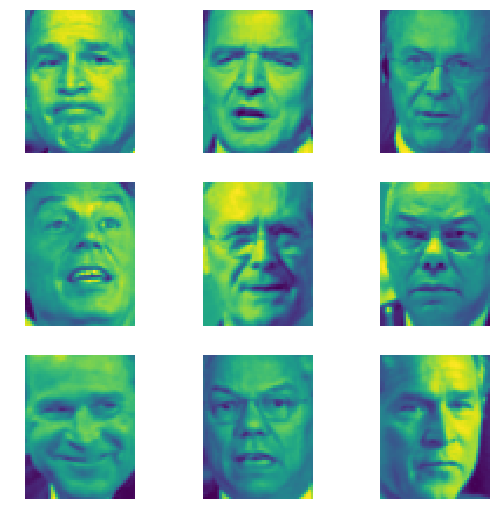

In [126]:
# Show data images
plt.figure(figsize=(9,9))

for i in range(9):
    plt.subplot(330+i+1)
    plt.imshow(face.images[i],cmap="viridis")
    plt.axis("off") 
   


## Classic Machine Learning Applications

**Reference**:
- http://scikit-learn.org/stable/supervised_learning.html

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_model=LogisticRegression()

In [129]:
log_model.fit(x_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [130]:
log_model.score(x_ts,y_ts)

0.8526315789473684

### SVM (Support Vector Machine)

In [0]:
from sklearn.svm import SVC,LinearSVC

In [0]:
# TRY => ["poly","linear","sigmoid"]
svm_model=SVC(kernel="rbf")

In [133]:
svm_model.fit(x_tr,y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
svm_model.score(x_ts,y_ts)

0.44912280701754387

In [0]:
# Linear SVM
lsvm_model=LinearSVC()

In [136]:
lsvm_model.fit(x_tr,y_tr)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [137]:
lsvm_model.score(x_ts,y_ts)

0.8421052631578947

## Deep & Neural Network

### Multilayer Perceptron


In [0]:
from sklearn.neural_network import MLPClassifier

Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

In [0]:
mlp_model=MLPClassifier()

In [148]:
mlp_model.fit(x_tr,y_tr)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [149]:
mlp_model.score(x_ts,y_ts)

0.8385964912280702

### Deep Neural Network

**Reference:**
- http://cs231n.github.io/
- https://github.com/fchollet/deep-learning-with-python-notebooks

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

In [151]:
# Preproceses Data
y_tr=to_categorical(y_tr)
y_ts=to_categorical(y_ts)
y_ts.shape

(285, 5)

In [152]:
model=models.Sequential()
model.add(layers.Dense(1024,activation="relu",input_shape=[2914,]))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5,activation="softmax"))

model.compile(optimizer=optimizers.Adam(lr=0.0001),
              loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              2984960   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_61 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_63 (Dropout)         (None, 256)               0         
__________

In [153]:
model_history=model.fit(x_tr,y_tr,batch_size=24,epochs=200,verbose=1,

                        validation_data=[x_ts,y_ts])

Train on 855 samples, validate on 285 samples
Epoch 1/200
855/855 [==============================] - 11s 13ms/step - loss: 1.5937 - acc: 0.3509 - val_loss: 1.4610 - val_acc: 0.4491
Epoch 2/200
855/855 [==============================] - 1s 679us/step - loss: 1.5114 - acc: 0.3988 - val_loss: 1.4296 - val_acc: 0.4491
Epoch 3/200
855/855 [==============================] - 1s 674us/step - loss: 1.4894 - acc: 0.4374 - val_loss: 1.4210 - val_acc: 0.4491
Epoch 4/200
855/855 [==============================] - 1s 689us/step - loss: 1.4327 - acc: 0.4480 - val_loss: 1.4199 - val_acc: 0.4491
Epoch 5/200
855/855 [==============================] - 1s 681us/step - loss: 1.4442 - acc: 0.4561 - val_loss: 1.4155 - val_acc: 0.4491
Epoch 6/200
855/855 [==============================] - 1s 679us/step - loss: 1.4454 - acc: 0.4515 - val_loss: 1.4211 - val_acc: 0.4491
Epoch 7/200
855/855 [==============================] - 1s 676us/step - loss: 1.4285 - acc: 0.4608 - val_loss: 1.4179 - val_acc: 0.4491
Epoch 8/2

855/855 [==============================] - 1s 678us/step - loss: 1.3326 - acc: 0.4994 - val_loss: 1.2916 - val_acc: 0.5053
Epoch 13/200
855/855 [==============================] - 1s 663us/step - loss: 1.2982 - acc: 0.5076 - val_loss: 1.2615 - val_acc: 0.5298
Epoch 14/200
855/855 [==============================] - 1s 682us/step - loss: 1.2670 - acc: 0.5275 - val_loss: 1.2137 - val_acc: 0.5368
Epoch 15/200
855/855 [==============================] - 1s 685us/step - loss: 1.2396 - acc: 0.5368 - val_loss: 1.3787 - val_acc: 0.4807
Epoch 16/200
855/855 [==============================] - 1s 683us/step - loss: 1.2448 - acc: 0.5251 - val_loss: 1.1767 - val_acc: 0.5333
Epoch 17/200
855/855 [==============================] - 1s 680us/step - loss: 1.1953 - acc: 0.5556 - val_loss: 1.1805 - val_acc: 0.5439
Epoch 18/200
855/855 [==============================] - 1s 676us/step - loss: 1.1384 - acc: 0.5836 - val_loss: 1.2107 - val_acc: 0.5368
Epoch 19/200
855/855 [==============================] - 1s 66

Epoch 24/200
855/855 [==============================] - 1s 679us/step - loss: 1.0299 - acc: 0.6082 - val_loss: 1.0618 - val_acc: 0.5754
Epoch 25/200
855/855 [==============================] - 1s 680us/step - loss: 0.9939 - acc: 0.6129 - val_loss: 1.1037 - val_acc: 0.5684
Epoch 26/200
855/855 [==============================] - 1s 684us/step - loss: 0.9958 - acc: 0.6211 - val_loss: 1.0713 - val_acc: 0.5649
Epoch 27/200
855/855 [==============================] - 1s 678us/step - loss: 1.0410 - acc: 0.5988 - val_loss: 1.0223 - val_acc: 0.6175
Epoch 28/200
855/855 [==============================] - 1s 672us/step - loss: 0.9899 - acc: 0.6105 - val_loss: 1.0856 - val_acc: 0.6035
Epoch 29/200
855/855 [==============================] - 1s 678us/step - loss: 1.0160 - acc: 0.6094 - val_loss: 1.0907 - val_acc: 0.6070
Epoch 30/200
855/855 [==============================] - 1s 685us/step - loss: 0.9418 - acc: 0.6386 - val_loss: 1.0510 - val_acc: 0.5895
Epoch 31/200
855/855 [==========================

855/855 [==============================] - 1s 672us/step - loss: 0.8360 - acc: 0.6643 - val_loss: 0.9196 - val_acc: 0.6491
Epoch 36/200
855/855 [==============================] - 1s 666us/step - loss: 0.7978 - acc: 0.6936 - val_loss: 0.9414 - val_acc: 0.6807
Epoch 37/200
855/855 [==============================] - 1s 690us/step - loss: 0.7832 - acc: 0.6901 - val_loss: 1.0532 - val_acc: 0.6386
Epoch 38/200
855/855 [==============================] - 1s 680us/step - loss: 0.7932 - acc: 0.7064 - val_loss: 0.8994 - val_acc: 0.6702
Epoch 39/200
855/855 [==============================] - 1s 678us/step - loss: 0.7996 - acc: 0.6678 - val_loss: 0.8700 - val_acc: 0.6877
Epoch 40/200
855/855 [==============================] - 1s 679us/step - loss: 0.7163 - acc: 0.7181 - val_loss: 0.9390 - val_acc: 0.6737
Epoch 41/200
855/855 [==============================] - 1s 680us/step - loss: 0.7809 - acc: 0.6924 - val_loss: 0.9091 - val_acc: 0.6807
Epoch 42/200
855/855 [==============================] - 1s 66

Epoch 47/200
855/855 [==============================] - 1s 666us/step - loss: 0.6354 - acc: 0.7439 - val_loss: 0.7957 - val_acc: 0.7263
Epoch 48/200
855/855 [==============================] - 1s 663us/step - loss: 0.5909 - acc: 0.7626 - val_loss: 0.7618 - val_acc: 0.7333
Epoch 49/200
855/855 [==============================] - 1s 661us/step - loss: 0.5914 - acc: 0.7883 - val_loss: 0.7531 - val_acc: 0.7684
Epoch 50/200
855/855 [==============================] - 1s 709us/step - loss: 0.5657 - acc: 0.7801 - val_loss: 0.8673 - val_acc: 0.7404
Epoch 51/200
855/855 [==============================] - 1s 678us/step - loss: 0.5333 - acc: 0.7988 - val_loss: 0.7746 - val_acc: 0.7404
Epoch 52/200
855/855 [==============================] - 1s 674us/step - loss: 0.5579 - acc: 0.7895 - val_loss: 0.8538 - val_acc: 0.7018
Epoch 53/200
855/855 [==============================] - 1s 687us/step - loss: 0.5551 - acc: 0.7953 - val_loss: 0.7835 - val_acc: 0.7298
Epoch 54/200
855/855 [==========================

855/855 [==============================] - 1s 666us/step - loss: 0.4124 - acc: 0.8561 - val_loss: 0.7541 - val_acc: 0.7544
Epoch 59/200
855/855 [==============================] - 1s 674us/step - loss: 0.4392 - acc: 0.8351 - val_loss: 0.8517 - val_acc: 0.7298
Epoch 60/200
855/855 [==============================] - 1s 685us/step - loss: 0.5176 - acc: 0.8187 - val_loss: 0.7450 - val_acc: 0.7789
Epoch 61/200
855/855 [==============================] - 1s 680us/step - loss: 0.4235 - acc: 0.8468 - val_loss: 0.7342 - val_acc: 0.7965
Epoch 62/200
855/855 [==============================] - 1s 676us/step - loss: 0.4140 - acc: 0.8480 - val_loss: 0.6839 - val_acc: 0.8000
Epoch 63/200
855/855 [==============================] - 1s 663us/step - loss: 0.4168 - acc: 0.8655 - val_loss: 0.6923 - val_acc: 0.7754
Epoch 64/200
855/855 [==============================] - 1s 662us/step - loss: 0.4766 - acc: 0.8281 - val_loss: 0.7809 - val_acc: 0.7474
Epoch 65/200
855/855 [==============================] - 1s 67

855/855 [==============================] - 1s 668us/step - loss: 0.3186 - acc: 0.8924 - val_loss: 0.6535 - val_acc: 0.8105
Epoch 70/200
855/855 [==============================] - 1s 686us/step - loss: 0.3400 - acc: 0.8795 - val_loss: 0.6521 - val_acc: 0.7965
Epoch 71/200
855/855 [==============================] - 1s 675us/step - loss: 0.3079 - acc: 0.9018 - val_loss: 0.7584 - val_acc: 0.7368
Epoch 72/200
855/855 [==============================] - 1s 682us/step - loss: 0.3691 - acc: 0.8690 - val_loss: 0.7299 - val_acc: 0.8105
Epoch 73/200
855/855 [==============================] - 1s 673us/step - loss: 0.2876 - acc: 0.9006 - val_loss: 0.7262 - val_acc: 0.8035
Epoch 74/200
855/855 [==============================] - 1s 672us/step - loss: 0.2825 - acc: 0.9088 - val_loss: 0.8559 - val_acc: 0.7754
Epoch 75/200
855/855 [==============================] - 1s 667us/step - loss: 0.3268 - acc: 0.9006 - val_loss: 0.7109 - val_acc: 0.8175
Epoch 76/200
855/855 [==============================] - 1s 68

855/855 [==============================] - 1s 691us/step - loss: 0.2421 - acc: 0.9193 - val_loss: 0.6922 - val_acc: 0.8070
Epoch 81/200
855/855 [==============================] - 1s 672us/step - loss: 0.2475 - acc: 0.9193 - val_loss: 0.7318 - val_acc: 0.8211
Epoch 82/200
855/855 [==============================] - 1s 671us/step - loss: 0.2486 - acc: 0.9181 - val_loss: 0.8584 - val_acc: 0.7474
Epoch 83/200
855/855 [==============================] - 1s 680us/step - loss: 0.2233 - acc: 0.9251 - val_loss: 0.6734 - val_acc: 0.8281
Epoch 84/200
855/855 [==============================] - 1s 679us/step - loss: 0.1958 - acc: 0.9345 - val_loss: 0.6683 - val_acc: 0.8175
Epoch 85/200
855/855 [==============================] - 1s 679us/step - loss: 0.2340 - acc: 0.9228 - val_loss: 0.7557 - val_acc: 0.8035
Epoch 86/200
855/855 [==============================] - 1s 684us/step - loss: 0.3204 - acc: 0.8854 - val_loss: 0.7207 - val_acc: 0.7965
Epoch 87/200
855/855 [==============================] - 1s 66

Epoch 92/200
855/855 [==============================] - 1s 665us/step - loss: 0.1755 - acc: 0.9310 - val_loss: 0.8395 - val_acc: 0.7719
Epoch 93/200
855/855 [==============================] - 1s 672us/step - loss: 0.1835 - acc: 0.9345 - val_loss: 0.6872 - val_acc: 0.8526
Epoch 94/200
855/855 [==============================] - 1s 670us/step - loss: 0.2149 - acc: 0.9310 - val_loss: 0.6664 - val_acc: 0.8316
Epoch 95/200
855/855 [==============================] - 1s 675us/step - loss: 0.2481 - acc: 0.9029 - val_loss: 0.8292 - val_acc: 0.7754
Epoch 96/200
855/855 [==============================] - 1s 664us/step - loss: 0.2096 - acc: 0.9333 - val_loss: 0.7596 - val_acc: 0.8175
Epoch 97/200
855/855 [==============================] - 1s 674us/step - loss: 0.1793 - acc: 0.9357 - val_loss: 0.7527 - val_acc: 0.8386
Epoch 98/200
855/855 [==============================] - 1s 684us/step - loss: 0.1671 - acc: 0.9462 - val_loss: 0.7565 - val_acc: 0.8246
Epoch 99/200
855/855 [==========================

855/855 [==============================] - 1s 696us/step - loss: 0.1896 - acc: 0.9287 - val_loss: 0.7363 - val_acc: 0.8281
Epoch 104/200
855/855 [==============================] - 1s 680us/step - loss: 0.1818 - acc: 0.9415 - val_loss: 0.9648 - val_acc: 0.8070
Epoch 105/200
855/855 [==============================] - 1s 669us/step - loss: 0.1851 - acc: 0.9357 - val_loss: 0.9775 - val_acc: 0.7754
Epoch 106/200
855/855 [==============================] - 1s 686us/step - loss: 0.1572 - acc: 0.9520 - val_loss: 0.7096 - val_acc: 0.8281
Epoch 107/200
855/855 [==============================] - 1s 687us/step - loss: 0.1315 - acc: 0.9544 - val_loss: 0.9907 - val_acc: 0.8000
Epoch 108/200
855/855 [==============================] - 1s 684us/step - loss: 0.1602 - acc: 0.9450 - val_loss: 0.7221 - val_acc: 0.8351
Epoch 109/200
855/855 [==============================] - 1s 671us/step - loss: 0.1224 - acc: 0.9684 - val_loss: 0.7203 - val_acc: 0.8175
Epoch 110/200
855/855 [==============================] 

855/855 [==============================] - 1s 699us/step - loss: 0.1400 - acc: 0.9520 - val_loss: 0.7430 - val_acc: 0.8561
Epoch 115/200
855/855 [==============================] - 1s 684us/step - loss: 0.1375 - acc: 0.9532 - val_loss: 0.8606 - val_acc: 0.8351
Epoch 116/200
855/855 [==============================] - 1s 678us/step - loss: 0.2288 - acc: 0.9193 - val_loss: 0.7412 - val_acc: 0.8070
Epoch 117/200
855/855 [==============================] - 1s 679us/step - loss: 0.2235 - acc: 0.9193 - val_loss: 0.7197 - val_acc: 0.8316
Epoch 118/200
855/855 [==============================] - 1s 677us/step - loss: 0.1197 - acc: 0.9614 - val_loss: 0.7944 - val_acc: 0.8281
Epoch 119/200
855/855 [==============================] - 1s 694us/step - loss: 0.1296 - acc: 0.9626 - val_loss: 0.6426 - val_acc: 0.8491
Epoch 120/200
855/855 [==============================] - 1s 680us/step - loss: 0.1178 - acc: 0.9602 - val_loss: 0.7250 - val_acc: 0.8351
Epoch 121/200
855/855 [==============================] 

Epoch 126/200
855/855 [==============================] - 1s 686us/step - loss: 0.1097 - acc: 0.9673 - val_loss: 0.6935 - val_acc: 0.8632
Epoch 127/200
855/855 [==============================] - 1s 679us/step - loss: 0.0857 - acc: 0.9754 - val_loss: 1.0718 - val_acc: 0.7649
Epoch 128/200
855/855 [==============================] - 1s 678us/step - loss: 0.1541 - acc: 0.9497 - val_loss: 0.8087 - val_acc: 0.8246
Epoch 129/200
855/855 [==============================] - 1s 677us/step - loss: 0.1454 - acc: 0.9462 - val_loss: 0.8217 - val_acc: 0.8351
Epoch 130/200
855/855 [==============================] - 1s 679us/step - loss: 0.1008 - acc: 0.9673 - val_loss: 0.8219 - val_acc: 0.8211
Epoch 131/200
855/855 [==============================] - 1s 688us/step - loss: 0.0781 - acc: 0.9743 - val_loss: 0.7161 - val_acc: 0.8596
Epoch 132/200
855/855 [==============================] - 1s 687us/step - loss: 0.1276 - acc: 0.9556 - val_loss: 0.7684 - val_acc: 0.8105
Epoch 133/200
855/855 [==================

855/855 [==============================] - 1s 729us/step - loss: 0.0964 - acc: 0.9661 - val_loss: 0.8377 - val_acc: 0.8281
Epoch 138/200
855/855 [==============================] - 1s 699us/step - loss: 0.0884 - acc: 0.9684 - val_loss: 0.7002 - val_acc: 0.8702
Epoch 139/200
855/855 [==============================] - 1s 709us/step - loss: 0.1295 - acc: 0.9520 - val_loss: 0.8447 - val_acc: 0.8105
Epoch 140/200
855/855 [==============================] - 1s 716us/step - loss: 0.1868 - acc: 0.9427 - val_loss: 0.8360 - val_acc: 0.8351
Epoch 141/200
855/855 [==============================] - 1s 690us/step - loss: 0.0965 - acc: 0.9696 - val_loss: 0.8900 - val_acc: 0.8386
Epoch 142/200
855/855 [==============================] - 1s 683us/step - loss: 0.0932 - acc: 0.9731 - val_loss: 0.7908 - val_acc: 0.8667
Epoch 143/200
855/855 [==============================] - 1s 685us/step - loss: 0.0855 - acc: 0.9743 - val_loss: 0.7732 - val_acc: 0.8526
Epoch 144/200
855/855 [==============================] 

855/855 [==============================] - 1s 684us/step - loss: 0.0943 - acc: 0.9673 - val_loss: 0.9416 - val_acc: 0.8421
Epoch 149/200
855/855 [==============================] - 1s 679us/step - loss: 0.0951 - acc: 0.9696 - val_loss: 1.1143 - val_acc: 0.8175
Epoch 150/200
855/855 [==============================] - 1s 670us/step - loss: 0.1528 - acc: 0.9450 - val_loss: 1.0066 - val_acc: 0.8211
Epoch 151/200
855/855 [==============================] - 1s 687us/step - loss: 0.2839 - acc: 0.9064 - val_loss: 0.8470 - val_acc: 0.8351
Epoch 152/200
855/855 [==============================] - 1s 684us/step - loss: 0.2344 - acc: 0.9123 - val_loss: 1.0762 - val_acc: 0.7684
Epoch 153/200
855/855 [==============================] - 1s 674us/step - loss: 0.1591 - acc: 0.9532 - val_loss: 0.7451 - val_acc: 0.8316
Epoch 154/200
855/855 [==============================] - 1s 688us/step - loss: 0.0732 - acc: 0.9789 - val_loss: 0.8232 - val_acc: 0.8175
Epoch 155/200
855/855 [==============================] 

Epoch 160/200
855/855 [==============================] - 1s 684us/step - loss: 0.0555 - acc: 0.9836 - val_loss: 0.8168 - val_acc: 0.8491
Epoch 161/200
855/855 [==============================] - 1s 679us/step - loss: 0.0565 - acc: 0.9848 - val_loss: 0.9248 - val_acc: 0.8491
Epoch 162/200
855/855 [==============================] - 1s 665us/step - loss: 0.0385 - acc: 0.9883 - val_loss: 0.8635 - val_acc: 0.8281
Epoch 163/200
855/855 [==============================] - 1s 684us/step - loss: 0.0466 - acc: 0.9860 - val_loss: 1.0437 - val_acc: 0.8070
Epoch 164/200
855/855 [==============================] - 1s 671us/step - loss: 0.0775 - acc: 0.9731 - val_loss: 1.3750 - val_acc: 0.7754
Epoch 165/200
855/855 [==============================] - 1s 685us/step - loss: 0.1962 - acc: 0.9380 - val_loss: 0.7420 - val_acc: 0.8561
Epoch 166/200
855/855 [==============================] - 1s 673us/step - loss: 0.2083 - acc: 0.9287 - val_loss: 0.8581 - val_acc: 0.8175
Epoch 167/200
855/855 [==================

855/855 [==============================] - 1s 681us/step - loss: 0.1283 - acc: 0.9591 - val_loss: 0.8023 - val_acc: 0.8456
Epoch 172/200
855/855 [==============================] - 1s 684us/step - loss: 0.1271 - acc: 0.9532 - val_loss: 0.8742 - val_acc: 0.8070
Epoch 173/200
855/855 [==============================] - 1s 710us/step - loss: 0.0809 - acc: 0.9673 - val_loss: 0.8298 - val_acc: 0.8491
Epoch 174/200
855/855 [==============================] - 1s 710us/step - loss: 0.0516 - acc: 0.9825 - val_loss: 0.8000 - val_acc: 0.8421
Epoch 175/200
855/855 [==============================] - 1s 701us/step - loss: 0.0456 - acc: 0.9848 - val_loss: 1.0871 - val_acc: 0.7965
Epoch 176/200
855/855 [==============================] - 1s 673us/step - loss: 0.0463 - acc: 0.9825 - val_loss: 0.9099 - val_acc: 0.8596
Epoch 177/200
855/855 [==============================] - 1s 683us/step - loss: 0.0954 - acc: 0.9626 - val_loss: 0.8810 - val_acc: 0.8351
Epoch 178/200
855/855 [==============================] 

855/855 [==============================] - 1s 666us/step - loss: 0.1212 - acc: 0.9626 - val_loss: 0.8243 - val_acc: 0.8351
Epoch 183/200
855/855 [==============================] - 1s 667us/step - loss: 0.0377 - acc: 0.9918 - val_loss: 0.8718 - val_acc: 0.8421
Epoch 184/200
855/855 [==============================] - 1s 690us/step - loss: 0.0484 - acc: 0.9848 - val_loss: 0.9257 - val_acc: 0.8561
Epoch 185/200
855/855 [==============================] - 1s 687us/step - loss: 0.0433 - acc: 0.9871 - val_loss: 0.9792 - val_acc: 0.8316
Epoch 186/200
855/855 [==============================] - 1s 684us/step - loss: 0.0482 - acc: 0.9860 - val_loss: 1.0829 - val_acc: 0.8316
Epoch 187/200
855/855 [==============================] - 1s 676us/step - loss: 0.1439 - acc: 0.9509 - val_loss: 1.0271 - val_acc: 0.7754
Epoch 188/200
855/855 [==============================] - 1s 708us/step - loss: 0.2225 - acc: 0.9380 - val_loss: 0.7024 - val_acc: 0.8561
Epoch 189/200
855/855 [==============================] 

855/855 [==============================] - 1s 680us/step - loss: 0.0339 - acc: 0.9918 - val_loss: 0.8672 - val_acc: 0.8491
Epoch 194/200
855/855 [==============================] - 1s 666us/step - loss: 0.0278 - acc: 0.9930 - val_loss: 0.8579 - val_acc: 0.8491
Epoch 195/200
855/855 [==============================] - 1s 680us/step - loss: 0.0524 - acc: 0.9836 - val_loss: 1.3294 - val_acc: 0.8175
Epoch 196/200
855/855 [==============================] - 1s 682us/step - loss: 0.0894 - acc: 0.9778 - val_loss: 0.9151 - val_acc: 0.8351
Epoch 197/200
855/855 [==============================] - 1s 687us/step - loss: 0.2883 - acc: 0.9018 - val_loss: 0.7313 - val_acc: 0.8070
Epoch 198/200
855/855 [==============================] - 1s 695us/step - loss: 0.1160 - acc: 0.9626 - val_loss: 0.8836 - val_acc: 0.8386
Epoch 199/200
855/855 [==============================] - 1s 675us/step - loss: 0.0634 - acc: 0.9778 - val_loss: 0.8907 - val_acc: 0.8281
Epoch 200/200
855/855 [==============================] 

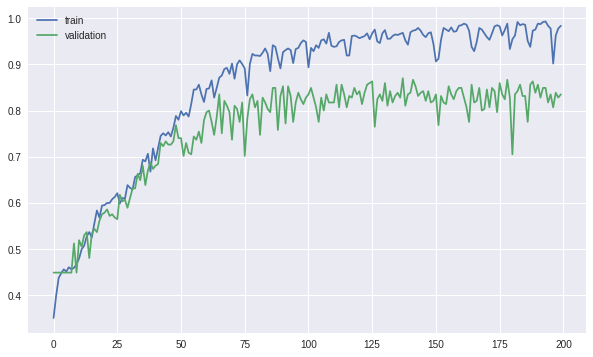

In [154]:
plt.figure(figsize=(10,6))
plt.plot(model_history.history["acc"])
plt.plot(model_history.history["val_acc"])
plt.legend(["train","validation"])

In [155]:
model.evaluate(x_ts,y_ts)

285/285 [==============================] - 0s 139us/step


[0.9568404726814805, 0.8350877182525501]

In [156]:
np.array(model_history.history["val_acc"][-15:]).mean()

0.8339181275535048

In [157]:
np.array(model_history.history["acc"][-15:]).mean()

0.9713840116255466

### Convnet Part

In [0]:
x_tr,x_ts,y_tr,y_ts=train_test_split(face.data.reshape([1140,62,47,1]),
                                                            face.target)

In [159]:
x_tr=x_tr/255
x_ts=x_ts/255
y_tr=to_categorical(y_tr)
y_ts=to_categorical(y_ts)
y_ts.shape

(285, 5)

In [160]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="elu",input_shape=(62,47,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64,(3,3),activation="elu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),activation="elu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512,activation="elu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5,activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 60, 45, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 22, 32)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 28, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 10, 64)        0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 14, 10, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 12, 8, 128)        73856     
__________

In [0]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [162]:

train_history=model.fit(x_tr,y_tr,batch_size=64,epochs=120,
                        validation_data=(x_ts,y_ts))

Train on 855 samples, validate on 285 samples
Epoch 1/120
855/855 [==============================] - 10s 12ms/step - loss: 1.6974 - acc: 0.3673 - val_loss: 1.6029 - val_acc: 0.1930
Epoch 2/120
855/855 [==============================] - 0s 482us/step - loss: 1.4332 - acc: 0.4620 - val_loss: 1.4409 - val_acc: 0.4667
Epoch 3/120
855/855 [==============================] - 0s 468us/step - loss: 1.3513 - acc: 0.4713 - val_loss: 1.4849 - val_acc: 0.5228
Epoch 4/120
855/855 [==============================] - 0s 475us/step - loss: 1.3360 - acc: 0.4854 - val_loss: 1.3661 - val_acc: 0.4596
Epoch 5/120
855/855 [==============================] - 0s 463us/step - loss: 1.1930 - acc: 0.5170 - val_loss: 1.1246 - val_acc: 0.5614
Epoch 6/120
855/855 [==============================] - 0s 461us/step - loss: 1.0416 - acc: 0.6246 - val_loss: 0.9946 - val_acc: 0.5895
Epoch 7/120
855/855 [==============================] - 0s 467us/step - loss: 0.8404 - acc: 0.7053 - val_loss: 0.7747 - val_acc: 0.7298
Epoch 8/1

Epoch 14/120
855/855 [==============================] - 0s 463us/step - loss: 0.3527 - acc: 0.8737 - val_loss: 0.4670 - val_acc: 0.8561
Epoch 15/120
855/855 [==============================] - 0s 456us/step - loss: 0.2662 - acc: 0.9111 - val_loss: 0.4458 - val_acc: 0.8456
Epoch 16/120
855/855 [==============================] - 0s 467us/step - loss: 0.2523 - acc: 0.9158 - val_loss: 0.4816 - val_acc: 0.8667
Epoch 17/120
855/855 [==============================] - 0s 460us/step - loss: 0.2338 - acc: 0.9123 - val_loss: 0.4475 - val_acc: 0.8526
Epoch 18/120
855/855 [==============================] - 0s 463us/step - loss: 0.2166 - acc: 0.9216 - val_loss: 0.4079 - val_acc: 0.8491
Epoch 19/120
855/855 [==============================] - 0s 450us/step - loss: 0.1892 - acc: 0.9322 - val_loss: 0.4370 - val_acc: 0.8632
Epoch 20/120
855/855 [==============================] - 0s 450us/step - loss: 0.1754 - acc: 0.9427 - val_loss: 0.3584 - val_acc: 0.8807
Epoch 21/120
855/855 [==========================

855/855 [==============================] - 0s 451us/step - loss: 0.0618 - acc: 0.9836 - val_loss: 0.3155 - val_acc: 0.9123
Epoch 28/120
855/855 [==============================] - 0s 455us/step - loss: 0.0566 - acc: 0.9848 - val_loss: 0.2843 - val_acc: 0.9228
Epoch 29/120
855/855 [==============================] - 0s 453us/step - loss: 0.0597 - acc: 0.9813 - val_loss: 0.3144 - val_acc: 0.9123
Epoch 30/120
855/855 [==============================] - 0s 459us/step - loss: 0.0369 - acc: 0.9965 - val_loss: 0.3226 - val_acc: 0.9158
Epoch 31/120
855/855 [==============================] - 0s 457us/step - loss: 0.0366 - acc: 0.9895 - val_loss: 0.2995 - val_acc: 0.9193
Epoch 32/120
855/855 [==============================] - 0s 448us/step - loss: 0.0503 - acc: 0.9836 - val_loss: 0.3021 - val_acc: 0.9228
Epoch 33/120
855/855 [==============================] - 0s 451us/step - loss: 0.0536 - acc: 0.9801 - val_loss: 0.3584 - val_acc: 0.9053
Epoch 34/120
855/855 [==============================] - 0s 44

855/855 [==============================] - 0s 458us/step - loss: 0.0356 - acc: 0.9918 - val_loss: 0.3449 - val_acc: 0.9088
Epoch 41/120
855/855 [==============================] - 0s 443us/step - loss: 0.0275 - acc: 0.9930 - val_loss: 0.3707 - val_acc: 0.8982
Epoch 42/120
855/855 [==============================] - 0s 442us/step - loss: 0.0397 - acc: 0.9871 - val_loss: 0.3121 - val_acc: 0.9158
Epoch 43/120
855/855 [==============================] - 0s 442us/step - loss: 0.0399 - acc: 0.9836 - val_loss: 0.3455 - val_acc: 0.9123
Epoch 44/120
855/855 [==============================] - 0s 456us/step - loss: 0.0395 - acc: 0.9848 - val_loss: 0.3655 - val_acc: 0.9088
Epoch 45/120
855/855 [==============================] - 0s 445us/step - loss: 0.0304 - acc: 0.9930 - val_loss: 0.3415 - val_acc: 0.9123
Epoch 46/120
855/855 [==============================] - 0s 445us/step - loss: 0.0277 - acc: 0.9918 - val_loss: 0.3112 - val_acc: 0.9263
Epoch 47/120
855/855 [==============================] - 0s 44

855/855 [==============================] - 0s 449us/step - loss: 0.0153 - acc: 0.9965 - val_loss: 0.3466 - val_acc: 0.9088
Epoch 54/120
855/855 [==============================] - 0s 451us/step - loss: 0.0174 - acc: 0.9942 - val_loss: 0.3137 - val_acc: 0.9228
Epoch 55/120
855/855 [==============================] - 0s 453us/step - loss: 0.0051 - acc: 0.9988 - val_loss: 0.3107 - val_acc: 0.9193
Epoch 56/120
855/855 [==============================] - 0s 457us/step - loss: 0.0103 - acc: 0.9953 - val_loss: 0.2800 - val_acc: 0.9298
Epoch 57/120
855/855 [==============================] - 0s 453us/step - loss: 0.0055 - acc: 0.9977 - val_loss: 0.2865 - val_acc: 0.9263
Epoch 58/120
855/855 [==============================] - 0s 453us/step - loss: 0.0147 - acc: 0.9930 - val_loss: 0.3409 - val_acc: 0.9088
Epoch 59/120
855/855 [==============================] - 0s 439us/step - loss: 0.0210 - acc: 0.9942 - val_loss: 0.3266 - val_acc: 0.9263
Epoch 60/120
855/855 [==============================] - 0s 43

855/855 [==============================] - 0s 447us/step - loss: 0.0471 - acc: 0.9848 - val_loss: 0.4112 - val_acc: 0.9088
Epoch 67/120
855/855 [==============================] - 0s 446us/step - loss: 0.0504 - acc: 0.9848 - val_loss: 0.3434 - val_acc: 0.9228
Epoch 68/120
855/855 [==============================] - 0s 438us/step - loss: 0.0361 - acc: 0.9860 - val_loss: 0.4341 - val_acc: 0.9053
Epoch 69/120
855/855 [==============================] - 0s 458us/step - loss: 0.0328 - acc: 0.9883 - val_loss: 0.3566 - val_acc: 0.9158
Epoch 70/120
855/855 [==============================] - 0s 454us/step - loss: 0.0235 - acc: 0.9906 - val_loss: 0.2739 - val_acc: 0.9333
Epoch 71/120
855/855 [==============================] - 0s 440us/step - loss: 0.0188 - acc: 0.9895 - val_loss: 0.2951 - val_acc: 0.9368
Epoch 72/120
855/855 [==============================] - 0s 435us/step - loss: 0.0090 - acc: 0.9977 - val_loss: 0.2810 - val_acc: 0.9333
Epoch 73/120
855/855 [==============================] - 0s 43

855/855 [==============================] - 0s 442us/step - loss: 0.0068 - acc: 0.9977 - val_loss: 0.2838 - val_acc: 0.9404
Epoch 80/120
855/855 [==============================] - 0s 450us/step - loss: 0.0078 - acc: 0.9977 - val_loss: 0.3177 - val_acc: 0.9368
Epoch 81/120
855/855 [==============================] - 0s 433us/step - loss: 0.0069 - acc: 0.9988 - val_loss: 0.3029 - val_acc: 0.9263
Epoch 82/120
855/855 [==============================] - 0s 439us/step - loss: 0.0088 - acc: 0.9953 - val_loss: 0.3216 - val_acc: 0.9298
Epoch 83/120
855/855 [==============================] - 0s 447us/step - loss: 0.0229 - acc: 0.9930 - val_loss: 0.3552 - val_acc: 0.9263
Epoch 84/120
855/855 [==============================] - 0s 444us/step - loss: 0.0086 - acc: 0.9953 - val_loss: 0.3996 - val_acc: 0.9298
Epoch 85/120
855/855 [==============================] - 0s 440us/step - loss: 0.0655 - acc: 0.9848 - val_loss: 0.4205 - val_acc: 0.9123
Epoch 86/120
855/855 [==============================] - 0s 44

855/855 [==============================] - 0s 448us/step - loss: 0.0145 - acc: 0.9930 - val_loss: 0.3610 - val_acc: 0.9298
Epoch 93/120
855/855 [==============================] - 0s 447us/step - loss: 0.0061 - acc: 0.9977 - val_loss: 0.3402 - val_acc: 0.9333
Epoch 94/120
855/855 [==============================] - 0s 432us/step - loss: 0.0032 - acc: 0.9988 - val_loss: 0.3920 - val_acc: 0.9193
Epoch 95/120
855/855 [==============================] - 0s 441us/step - loss: 0.0228 - acc: 0.9930 - val_loss: 0.3414 - val_acc: 0.9193
Epoch 96/120
855/855 [==============================] - 0s 449us/step - loss: 0.0111 - acc: 0.9953 - val_loss: 0.3254 - val_acc: 0.9298
Epoch 97/120
855/855 [==============================] - 0s 442us/step - loss: 0.0110 - acc: 0.9965 - val_loss: 0.4224 - val_acc: 0.9158
Epoch 98/120
855/855 [==============================] - 0s 445us/step - loss: 0.0053 - acc: 0.9977 - val_loss: 0.3952 - val_acc: 0.9263
Epoch 99/120
855/855 [==============================] - 0s 44

855/855 [==============================] - 0s 455us/step - loss: 0.0301 - acc: 0.9906 - val_loss: 0.4717 - val_acc: 0.9088
Epoch 106/120
855/855 [==============================] - 0s 454us/step - loss: 0.0183 - acc: 0.9918 - val_loss: 0.4959 - val_acc: 0.8947
Epoch 107/120
855/855 [==============================] - 0s 448us/step - loss: 0.1060 - acc: 0.9825 - val_loss: 0.7839 - val_acc: 0.8561
Epoch 108/120
855/855 [==============================] - 0s 451us/step - loss: 0.0703 - acc: 0.9754 - val_loss: 0.4105 - val_acc: 0.9123
Epoch 109/120
855/855 [==============================] - 0s 435us/step - loss: 0.0885 - acc: 0.9754 - val_loss: 0.5220 - val_acc: 0.8807
Epoch 110/120
855/855 [==============================] - 0s 463us/step - loss: 0.0706 - acc: 0.9801 - val_loss: 0.4164 - val_acc: 0.9158
Epoch 111/120
855/855 [==============================] - 0s 445us/step - loss: 0.0411 - acc: 0.9860 - val_loss: 0.4441 - val_acc: 0.9333
Epoch 112/120
855/855 [==============================] 

855/855 [==============================] - 0s 461us/step - loss: 0.0195 - acc: 0.9942 - val_loss: 0.3215 - val_acc: 0.9368
Epoch 119/120
855/855 [==============================] - 0s 441us/step - loss: 0.0442 - acc: 0.9883 - val_loss: 0.3767 - val_acc: 0.9439
Epoch 120/120
855/855 [==============================] - 0s 474us/step - loss: 0.0269 - acc: 0.9942 - val_loss: 0.3580 - val_acc: 0.9368


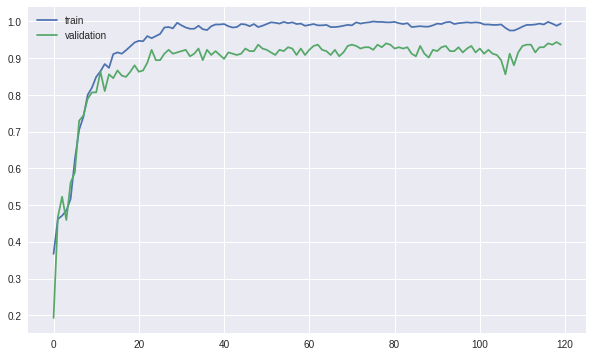

In [163]:
plt.figure(figsize=(10,6))
plt.plot(train_history.history["acc"])
plt.plot(train_history.history["val_acc"])
plt.legend(["train","validation"])

In [164]:
model.evaluate(x_ts,y_ts)

285/285 [==============================] - 0s 273us/step


[0.3579756162668529, 0.9368421056814361]

In [165]:
np.array(train_history.history["val_acc"][-15:]).mean()

0.920000000097598

In [166]:
np.array(train_history.history["acc"][-15:]).mean()

0.9883820663697538

### With Data Augmentation

**Reference:**
-  https://keras.io/preprocessing/image/
-  https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [169]:
x=face.data.reshape((1140,62,47,1))
y=to_categorical(face.target)
y.shape

(1140, 5)

In [0]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y)
train_datagen.fit(x_tr)
test_datagen.fit(x_ts)

In [171]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation="elu",input_shape=(62,47,1),border_mode="same"))
model.add(layers.Conv2D(32,(3,3),activation="elu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64,(3,3),activation="elu",border_mode="same"))
model.add(layers.Conv2D(64,(3,3),activation="elu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(128,(3,3),activation="elu",border_mode="same"))
model.add(layers.Conv2D(128,(3,3),activation="elu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(192,(3,3),activation="elu",border_mode="same"))
model.add(layers.Conv2D(192,(3,3),activation="elu"))

model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512,activation="elu"))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",
             metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="elu", input_shape=(62, 47, 1..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="elu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), activation="elu", padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 62, 47, 32)        320       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 60, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 30, 22, 32)        0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 30, 22, 64)        18496     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 28, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 10, 64)        0         
__________

In [172]:
aug_history = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=250,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)

Epoch 1/250
27/26 [==============================] - 13s 472ms/step - loss: 1.6274 - acc: 0.3678 - val_loss: 1.4371 - val_acc: 0.4807
Epoch 2/250
27/26 [==============================] - 1s 46ms/step - loss: 1.4331 - acc: 0.4656 - val_loss: 1.3851 - val_acc: 0.4807
Epoch 3/250
27/26 [==============================] - 1s 48ms/step - loss: 1.4204 - acc: 0.4351 - val_loss: 1.3088 - val_acc: 0.4596
Epoch 4/250
27/26 [==============================] - 1s 47ms/step - loss: 1.3298 - acc: 0.4943 - val_loss: 1.1295 - val_acc: 0.5684
Epoch 5/250
27/26 [==============================] - 1s 47ms/step - loss: 1.1993 - acc: 0.5446 - val_loss: 0.9910 - val_acc: 0.6175
Epoch 6/250
27/26 [==============================] - 1s 47ms/step - loss: 1.1943 - acc: 0.5376 - val_loss: 0.8293 - val_acc: 0.6596
Epoch 7/250
27/26 [==============================] - 1s 46ms/step - loss: 1.0373 - acc: 0.6091 - val_loss: 0.7888 - val_acc: 0.7228
Epoch 8/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.8020 - acc: 0.7013 - val_loss: 0.4075 - val_acc: 0.8351
Epoch 11/250
27/26 [==============================] - 1s 47ms/step - loss: 0.7527 - acc: 0.7288 - val_loss: 0.6021 - val_acc: 0.7860
Epoch 12/250
27/26 [==============================] - 1s 46ms/step - loss: 0.7813 - acc: 0.7279 - val_loss: 0.6171 - val_acc: 0.7825
Epoch 13/250
27/26 [==============================] - 1s 46ms/step - loss: 0.7035 - acc: 0.7397 - val_loss: 0.3655 - val_acc: 0.8596
Epoch 14/250
27/26 [==============================] - 1s 47ms/step - loss: 0.6418 - acc: 0.7820 - val_loss: 0.3323 - val_acc: 0.8807
Epoch 15/250
27/26 [==============================] - 1s 47ms/step - loss: 0.6247 - acc: 0.7764 - val_loss: 0.3114 - val_acc: 0.8912
Epoch 16/250
27/26 [==============================] - 1s 47ms/step - loss: 0.5748 - acc: 0.7906 - val_loss: 0.3128 - val_acc: 0.9053
Epoch 17/250
27/26 [==============================] - 1s 47ms/step - loss: 0.5802 

27/26 [==============================] - 1s 47ms/step - loss: 0.4604 - acc: 0.8267 - val_loss: 0.2336 - val_acc: 0.9123
Epoch 20/250
27/26 [==============================] - 1s 47ms/step - loss: 0.4678 - acc: 0.8440 - val_loss: 0.3047 - val_acc: 0.9018
Epoch 21/250
27/26 [==============================] - 1s 46ms/step - loss: 0.4129 - acc: 0.8580 - val_loss: 0.2608 - val_acc: 0.9088
Epoch 22/250
27/26 [==============================] - 1s 47ms/step - loss: 0.4309 - acc: 0.8582 - val_loss: 0.2482 - val_acc: 0.9193
Epoch 23/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3766 - acc: 0.8651 - val_loss: 0.2104 - val_acc: 0.9228
Epoch 24/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3331 - acc: 0.8786 - val_loss: 0.1959 - val_acc: 0.9228
Epoch 25/250
27/26 [==============================] - 1s 46ms/step - loss: 0.3541 - acc: 0.8689 - val_loss: 0.2524 - val_acc: 0.9263
Epoch 26/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3638 

27/26 [==============================] - 1s 47ms/step - loss: 0.3501 - acc: 0.8845 - val_loss: 0.4568 - val_acc: 0.8702
Epoch 29/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3671 - acc: 0.8718 - val_loss: 0.1785 - val_acc: 0.9544
Epoch 30/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3023 - acc: 0.9033 - val_loss: 0.1381 - val_acc: 0.9579
Epoch 31/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2643 - acc: 0.9153 - val_loss: 0.1652 - val_acc: 0.9439
Epoch 32/250
27/26 [==============================] - 1s 46ms/step - loss: 0.3050 - acc: 0.9035 - val_loss: 0.2961 - val_acc: 0.9158
Epoch 33/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3480 - acc: 0.8799 - val_loss: 0.2228 - val_acc: 0.9404
Epoch 34/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3942 - acc: 0.8776 - val_loss: 0.2141 - val_acc: 0.9088
Epoch 35/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3497 

27/26 [==============================] - 1s 46ms/step - loss: 0.3060 - acc: 0.9077 - val_loss: 0.2307 - val_acc: 0.9368
Epoch 38/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2382 - acc: 0.9150 - val_loss: 0.5917 - val_acc: 0.8772
Epoch 39/250
27/26 [==============================] - 1s 47ms/step - loss: 0.4189 - acc: 0.8674 - val_loss: 0.3388 - val_acc: 0.9053
Epoch 40/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2715 - acc: 0.9174 - val_loss: 0.1549 - val_acc: 0.9474
Epoch 41/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2318 - acc: 0.9315 - val_loss: 0.1289 - val_acc: 0.9614
Epoch 42/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2447 - acc: 0.9207 - val_loss: 0.2109 - val_acc: 0.9544
Epoch 43/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2530 - acc: 0.9185 - val_loss: 0.1911 - val_acc: 0.9333
Epoch 44/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2443 

27/26 [==============================] - 1s 46ms/step - loss: 0.2413 - acc: 0.9174 - val_loss: 0.1927 - val_acc: 0.9439
Epoch 47/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2341 - acc: 0.9354 - val_loss: 0.1809 - val_acc: 0.9368
Epoch 48/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1701 - acc: 0.9479 - val_loss: 0.1745 - val_acc: 0.9509
Epoch 49/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2848 - acc: 0.9227 - val_loss: 0.1685 - val_acc: 0.9404
Epoch 50/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2114 - acc: 0.9313 - val_loss: 0.1837 - val_acc: 0.9509
Epoch 51/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2370 - acc: 0.9234 - val_loss: 0.1801 - val_acc: 0.9579
Epoch 52/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2536 - acc: 0.9273 - val_loss: 0.2361 - val_acc: 0.9368
Epoch 53/250
27/26 [==============================] - 1s 48ms/step - loss: 0.3104 

27/26 [==============================] - 1s 47ms/step - loss: 0.2285 - acc: 0.9278 - val_loss: 0.1455 - val_acc: 0.9719
Epoch 56/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1975 - acc: 0.9394 - val_loss: 0.1559 - val_acc: 0.9509
Epoch 57/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1541 - acc: 0.9566 - val_loss: 0.0972 - val_acc: 0.9614
Epoch 58/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1289 - acc: 0.9570 - val_loss: 0.1339 - val_acc: 0.9509
Epoch 59/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1406 - acc: 0.9548 - val_loss: 0.1273 - val_acc: 0.9649
Epoch 60/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1253 - acc: 0.9560 - val_loss: 0.0919 - val_acc: 0.9754
Epoch 61/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1792 - acc: 0.9412 - val_loss: 0.1443 - val_acc: 0.9509
Epoch 62/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1511 

27/26 [==============================] - 1s 48ms/step - loss: 0.1620 - acc: 0.9521 - val_loss: 0.0892 - val_acc: 0.9649
Epoch 65/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1455 - acc: 0.9532 - val_loss: 0.0648 - val_acc: 0.9825
Epoch 66/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1489 - acc: 0.9560 - val_loss: 0.3798 - val_acc: 0.9263
Epoch 67/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1831 - acc: 0.9502 - val_loss: 0.1198 - val_acc: 0.9544
Epoch 68/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1109 - acc: 0.9625 - val_loss: 0.1102 - val_acc: 0.9719
Epoch 69/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2127 - acc: 0.9459 - val_loss: 0.1332 - val_acc: 0.9579
Epoch 70/250
27/26 [==============================] - 1s 48ms/step - loss: 0.2663 - acc: 0.9211 - val_loss: 0.2766 - val_acc: 0.8982
Epoch 71/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2733 

27/26 [==============================] - 1s 47ms/step - loss: 0.1367 - acc: 0.9567 - val_loss: 0.0878 - val_acc: 0.9789
Epoch 74/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2864 - acc: 0.9127 - val_loss: 0.0541 - val_acc: 0.9789
Epoch 75/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1855 - acc: 0.9405 - val_loss: 0.0725 - val_acc: 0.9719
Epoch 76/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1518 - acc: 0.9532 - val_loss: 0.0867 - val_acc: 0.9649
Epoch 77/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1054 - acc: 0.9687 - val_loss: 0.0767 - val_acc: 0.9719
Epoch 78/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0880 - acc: 0.9683 - val_loss: 0.0899 - val_acc: 0.9719
Epoch 79/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1076 - acc: 0.9653 - val_loss: 0.0983 - val_acc: 0.9579
Epoch 80/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1353 

27/26 [==============================] - 1s 46ms/step - loss: 0.0962 - acc: 0.9699 - val_loss: 0.0382 - val_acc: 0.9930
Epoch 83/250
27/26 [==============================] - 1s 48ms/step - loss: 0.1130 - acc: 0.9641 - val_loss: 0.1441 - val_acc: 0.9474
Epoch 84/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1298 - acc: 0.9653 - val_loss: 0.0773 - val_acc: 0.9614
Epoch 85/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1588 - acc: 0.9567 - val_loss: 0.1130 - val_acc: 0.9684
Epoch 86/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1104 - acc: 0.9629 - val_loss: 0.0496 - val_acc: 0.9895
Epoch 87/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0812 - acc: 0.9764 - val_loss: 0.0545 - val_acc: 0.9754
Epoch 88/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1012 - acc: 0.9590 - val_loss: 0.0928 - val_acc: 0.9684
Epoch 89/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1072 

27/26 [==============================] - 1s 47ms/step - loss: 0.0766 - acc: 0.9768 - val_loss: 0.0566 - val_acc: 0.9789
Epoch 92/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0694 - acc: 0.9826 - val_loss: 0.0818 - val_acc: 0.9754
Epoch 93/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1042 - acc: 0.9699 - val_loss: 0.0617 - val_acc: 0.9754
Epoch 94/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1170 - acc: 0.9586 - val_loss: 0.0667 - val_acc: 0.9789
Epoch 95/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1003 - acc: 0.9760 - val_loss: 0.0599 - val_acc: 0.9860
Epoch 96/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0636 - acc: 0.9829 - val_loss: 0.0812 - val_acc: 0.9719
Epoch 97/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0530 - acc: 0.9792 - val_loss: 0.0473 - val_acc: 0.9825
Epoch 98/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0789 

27/26 [==============================] - 1s 46ms/step - loss: 0.0407 - acc: 0.9861 - val_loss: 0.0297 - val_acc: 0.9895
Epoch 101/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0658 - acc: 0.9834 - val_loss: 0.0871 - val_acc: 0.9719
Epoch 102/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1307 - acc: 0.9641 - val_loss: 0.0893 - val_acc: 0.9684
Epoch 103/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0922 - acc: 0.9706 - val_loss: 0.0469 - val_acc: 0.9860
Epoch 104/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1364 - acc: 0.9653 - val_loss: 0.1005 - val_acc: 0.9649
Epoch 105/250
27/26 [==============================] - 1s 45ms/step - loss: 0.1020 - acc: 0.9757 - val_loss: 0.0580 - val_acc: 0.9789
Epoch 106/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1223 - acc: 0.9648 - val_loss: 0.0685 - val_acc: 0.9860
Epoch 107/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.1322 - acc: 0.9629 - val_loss: 0.2181 - val_acc: 0.9649
Epoch 110/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2993 - acc: 0.9278 - val_loss: 0.0679 - val_acc: 0.9860
Epoch 111/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1379 - acc: 0.9629 - val_loss: 0.0607 - val_acc: 0.9860
Epoch 112/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1034 - acc: 0.9695 - val_loss: 0.1961 - val_acc: 0.9719
Epoch 113/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0620 - acc: 0.9826 - val_loss: 0.0435 - val_acc: 0.9930
Epoch 114/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0428 - acc: 0.9826 - val_loss: 0.0281 - val_acc: 0.9895
Epoch 115/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1636 - acc: 0.9648 - val_loss: 0.1007 - val_acc: 0.9719
Epoch 116/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.0814 - acc: 0.9711 - val_loss: 0.0283 - val_acc: 0.9930
Epoch 119/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0604 - acc: 0.9787 - val_loss: 0.0820 - val_acc: 0.9719
Epoch 120/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0417 - acc: 0.9849 - val_loss: 0.0463 - val_acc: 0.9895
Epoch 121/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0828 - acc: 0.9826 - val_loss: 0.0981 - val_acc: 0.9719
Epoch 122/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0899 - acc: 0.9722 - val_loss: 0.0339 - val_acc: 0.9895
Epoch 123/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0762 - acc: 0.9752 - val_loss: 0.0197 - val_acc: 0.9930
Epoch 124/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0626 - acc: 0.9884 - val_loss: 0.0130 - val_acc: 0.9965
Epoch 125/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.1394 - acc: 0.9606 - val_loss: 0.1185 - val_acc: 0.9754
Epoch 128/250
27/26 [==============================] - 1s 48ms/step - loss: 0.1109 - acc: 0.9734 - val_loss: 0.1485 - val_acc: 0.9649
Epoch 129/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2371 - acc: 0.9347 - val_loss: 0.0715 - val_acc: 0.9825
Epoch 130/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1210 - acc: 0.9572 - val_loss: 0.1384 - val_acc: 0.9719
Epoch 131/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1442 - acc: 0.9583 - val_loss: 0.0951 - val_acc: 0.9754
Epoch 132/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1003 - acc: 0.9648 - val_loss: 0.1473 - val_acc: 0.9719
Epoch 133/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1479 - acc: 0.9699 - val_loss: 0.3768 - val_acc: 0.9509
Epoch 134/250
27/26 [==============================] - 1s 48ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.2370 - acc: 0.9431 - val_loss: 0.0943 - val_acc: 0.9684
Epoch 137/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1447 - acc: 0.9567 - val_loss: 0.1046 - val_acc: 0.9719
Epoch 138/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1096 - acc: 0.9653 - val_loss: 0.1941 - val_acc: 0.9789
Epoch 139/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1565 - acc: 0.9687 - val_loss: 0.0779 - val_acc: 0.9789
Epoch 140/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0693 - acc: 0.9757 - val_loss: 0.0712 - val_acc: 0.9860
Epoch 141/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0729 - acc: 0.9829 - val_loss: 0.1540 - val_acc: 0.9719
Epoch 142/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0954 - acc: 0.9810 - val_loss: 0.0611 - val_acc: 0.9789
Epoch 143/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.0528 - acc: 0.9845 - val_loss: 0.0594 - val_acc: 0.9789
Epoch 146/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1212 - acc: 0.9676 - val_loss: 0.0851 - val_acc: 0.9825
Epoch 147/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1611 - acc: 0.9671 - val_loss: 0.1235 - val_acc: 0.9544
Epoch 148/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0929 - acc: 0.9734 - val_loss: 0.0534 - val_acc: 0.9825
Epoch 149/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1181 - acc: 0.9683 - val_loss: 0.0882 - val_acc: 0.9789
Epoch 150/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0574 - acc: 0.9868 - val_loss: 0.0593 - val_acc: 0.9825
Epoch 151/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1825 - acc: 0.9590 - val_loss: 0.1131 - val_acc: 0.9579
Epoch 152/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.0968 - acc: 0.9713 - val_loss: 0.0598 - val_acc: 0.9789
Epoch 155/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0865 - acc: 0.9752 - val_loss: 0.1365 - val_acc: 0.9825
Epoch 156/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0472 - acc: 0.9834 - val_loss: 0.0755 - val_acc: 0.9860
Epoch 157/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1039 - acc: 0.9734 - val_loss: 0.1412 - val_acc: 0.9719
Epoch 158/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1170 - acc: 0.9706 - val_loss: 0.0560 - val_acc: 0.9860
Epoch 159/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0610 - acc: 0.9768 - val_loss: 0.1434 - val_acc: 0.9719
Epoch 160/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0965 - acc: 0.9711 - val_loss: 0.1379 - val_acc: 0.9719
Epoch 161/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.1241 - acc: 0.9653 - val_loss: 0.1454 - val_acc: 0.9719
Epoch 164/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0800 - acc: 0.9745 - val_loss: 0.0484 - val_acc: 0.9789
Epoch 165/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0762 - acc: 0.9757 - val_loss: 0.0560 - val_acc: 0.9825
Epoch 166/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0850 - acc: 0.9845 - val_loss: 0.1383 - val_acc: 0.9719
Epoch 167/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0585 - acc: 0.9845 - val_loss: 0.1456 - val_acc: 0.9614
Epoch 168/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0581 - acc: 0.9815 - val_loss: 0.1669 - val_acc: 0.9754
Epoch 169/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0641 - acc: 0.9873 - val_loss: 0.0560 - val_acc: 0.9719
Epoch 170/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.0717 - acc: 0.9776 - val_loss: 0.0426 - val_acc: 0.9825
Epoch 173/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0593 - acc: 0.9745 - val_loss: 0.0534 - val_acc: 0.9825
Epoch 174/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1085 - acc: 0.9815 - val_loss: 0.0750 - val_acc: 0.9754
Epoch 175/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1182 - acc: 0.9734 - val_loss: 0.0750 - val_acc: 0.9825
Epoch 176/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0504 - acc: 0.9838 - val_loss: 0.0559 - val_acc: 0.9860
Epoch 177/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0277 - acc: 0.9919 - val_loss: 0.0450 - val_acc: 0.9860
Epoch 178/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1350 - acc: 0.9718 - val_loss: 0.0435 - val_acc: 0.9860
Epoch 179/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.1413 - acc: 0.9653 - val_loss: 0.1038 - val_acc: 0.9719
Epoch 182/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0645 - acc: 0.9849 - val_loss: 0.0980 - val_acc: 0.9825
Epoch 183/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0656 - acc: 0.9826 - val_loss: 0.0348 - val_acc: 0.9860
Epoch 184/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0750 - acc: 0.9760 - val_loss: 0.0220 - val_acc: 0.9930
Epoch 185/250
27/26 [==============================] - 1s 48ms/step - loss: 0.0374 - acc: 0.9907 - val_loss: 0.0252 - val_acc: 0.9895
Epoch 186/250
27/26 [==============================] - 1s 48ms/step - loss: 0.0556 - acc: 0.9849 - val_loss: 0.0505 - val_acc: 0.9860
Epoch 187/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1084 - acc: 0.9838 - val_loss: 0.0189 - val_acc: 0.9930
Epoch 188/250
27/26 [==============================] - 1s 48ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.0713 - acc: 0.9799 - val_loss: 0.0446 - val_acc: 0.9895
Epoch 191/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0752 - acc: 0.9836 - val_loss: 0.0975 - val_acc: 0.9789
Epoch 192/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0641 - acc: 0.9849 - val_loss: 0.0544 - val_acc: 0.9825
Epoch 193/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0305 - acc: 0.9907 - val_loss: 0.0528 - val_acc: 0.9754
Epoch 194/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0196 - acc: 0.9926 - val_loss: 0.0914 - val_acc: 0.9789
Epoch 195/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1086 - acc: 0.9803 - val_loss: 0.0664 - val_acc: 0.9789
Epoch 196/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0363 - acc: 0.9896 - val_loss: 0.1425 - val_acc: 0.9649
Epoch 197/250
27/26 [==============================] - 1s 46ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.1124 - acc: 0.9764 - val_loss: 0.0914 - val_acc: 0.9789
Epoch 200/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1207 - acc: 0.9768 - val_loss: 0.0572 - val_acc: 0.9719
Epoch 201/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0880 - acc: 0.9780 - val_loss: 0.3222 - val_acc: 0.9228
Epoch 202/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3010 - acc: 0.9234 - val_loss: 0.1120 - val_acc: 0.9509
Epoch 203/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0795 - acc: 0.9752 - val_loss: 0.2687 - val_acc: 0.9649
Epoch 204/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1818 - acc: 0.9590 - val_loss: 0.3402 - val_acc: 0.9509
Epoch 205/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1491 - acc: 0.9595 - val_loss: 0.1314 - val_acc: 0.9649
Epoch 206/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.0819 - acc: 0.9838 - val_loss: 0.0159 - val_acc: 0.9965
Epoch 209/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0422 - acc: 0.9884 - val_loss: 0.0299 - val_acc: 0.9930
Epoch 210/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0431 - acc: 0.9896 - val_loss: 0.0352 - val_acc: 0.9895
Epoch 211/250
27/26 [==============================] - 1s 48ms/step - loss: 0.0375 - acc: 0.9880 - val_loss: 0.0583 - val_acc: 0.9895
Epoch 212/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0102 - acc: 0.9938 - val_loss: 0.0563 - val_acc: 0.9965
Epoch 213/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0796 - acc: 0.9815 - val_loss: 0.0109 - val_acc: 0.9930
Epoch 214/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0533 - acc: 0.9857 - val_loss: 0.1171 - val_acc: 0.9789
Epoch 215/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.0756 - acc: 0.9861 - val_loss: 0.0111 - val_acc: 0.9965
Epoch 218/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0290 - acc: 0.9884 - val_loss: 0.0312 - val_acc: 0.9895
Epoch 219/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0413 - acc: 0.9896 - val_loss: 0.0651 - val_acc: 0.9825
Epoch 220/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0508 - acc: 0.9861 - val_loss: 0.0599 - val_acc: 0.9860
Epoch 221/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0107 - acc: 0.9965 - val_loss: 0.0401 - val_acc: 0.9895
Epoch 222/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0591 - acc: 0.9884 - val_loss: 0.0823 - val_acc: 0.9860
Epoch 223/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1186 - acc: 0.9722 - val_loss: 0.0468 - val_acc: 0.9825
Epoch 224/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.0256 - acc: 0.9896 - val_loss: 0.0093 - val_acc: 0.9930
Epoch 227/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0256 - acc: 0.9931 - val_loss: 0.0196 - val_acc: 0.9965
Epoch 228/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0261 - acc: 0.9907 - val_loss: 0.0232 - val_acc: 0.9895
Epoch 229/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1332 - acc: 0.9706 - val_loss: 0.0992 - val_acc: 0.9719
Epoch 230/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0900 - acc: 0.9734 - val_loss: 0.1492 - val_acc: 0.9614
Epoch 231/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1608 - acc: 0.9745 - val_loss: 0.0857 - val_acc: 0.9719
Epoch 232/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0553 - acc: 0.9815 - val_loss: 0.0302 - val_acc: 0.9860
Epoch 233/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 45ms/step - loss: 0.0965 - acc: 0.9764 - val_loss: 0.0145 - val_acc: 0.9965
Epoch 236/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0700 - acc: 0.9826 - val_loss: 0.0452 - val_acc: 0.9825
Epoch 237/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0881 - acc: 0.9826 - val_loss: 0.1978 - val_acc: 0.9789
Epoch 238/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1766 - acc: 0.9612 - val_loss: 0.0381 - val_acc: 0.9860
Epoch 239/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0655 - acc: 0.9826 - val_loss: 0.2034 - val_acc: 0.9649
Epoch 240/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0535 - acc: 0.9826 - val_loss: 0.0761 - val_acc: 0.9860
Epoch 241/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1076 - acc: 0.9711 - val_loss: 0.0778 - val_acc: 0.9754
Epoch 242/250
27/26 [==============================] - 1s 46ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.1041 - acc: 0.9734 - val_loss: 0.0812 - val_acc: 0.9754
Epoch 245/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2104 - acc: 0.9572 - val_loss: 0.0854 - val_acc: 0.9789
Epoch 246/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2174 - acc: 0.9444 - val_loss: 0.0735 - val_acc: 0.9719
Epoch 247/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1069 - acc: 0.9711 - val_loss: 0.0960 - val_acc: 0.9754
Epoch 248/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0641 - acc: 0.9838 - val_loss: 0.1222 - val_acc: 0.9860
Epoch 249/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0752 - acc: 0.9845 - val_loss: 0.0618 - val_acc: 0.9825
Epoch 250/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0624 - acc: 0.9873 - val_loss: 0.0247 - val_acc: 0.9895


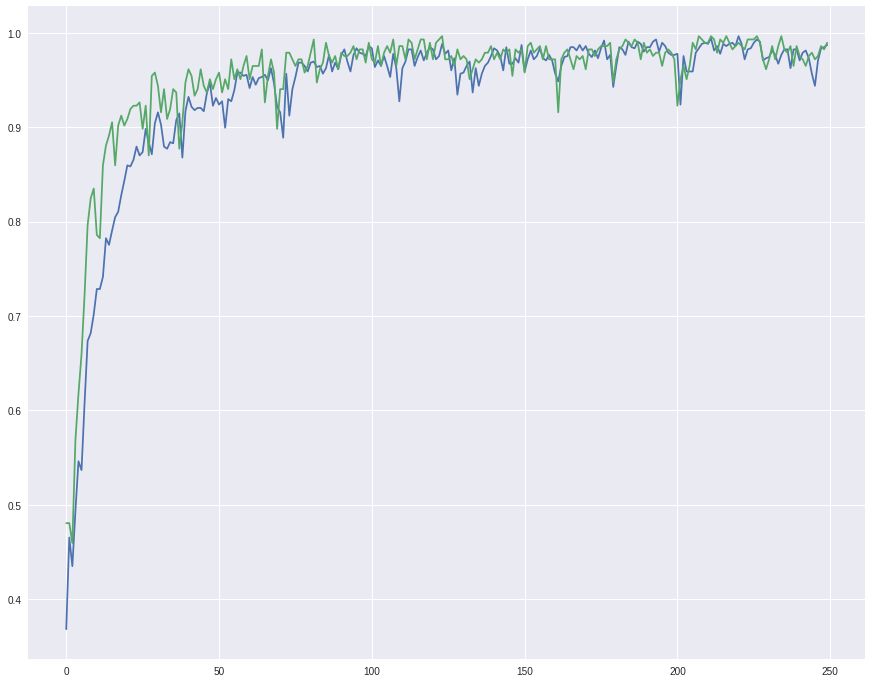

In [174]:
plt.figure(figsize=(15,12))
plt.plot(aug_history.history["acc"])
plt.plot(aug_history.history["val_acc"])

In [175]:
model.evaluate(x_ts/255,y_ts)

285/285 [==============================] - 0s 445us/step


[0.02468171409061158, 0.9894736842105263]

In [176]:
print("val accuracy average last 15 results :",np.array(aug_history.history["val_acc"][-15:]).mean())
print("val standard deviation last 15 results :",np.array(aug_history.history["val_acc"][-15:]).std())
print("train accuracy average last 15 results :",np.array(aug_history.history["acc"][-15:]).mean())
print("train standard deviation last 15 results :",np.array(aug_history.history["acc"][-15:]).std())

val accuracy average last 15 results : 0.9780116953626711
val standard deviation last 15 results : 0.007300344065487753
train accuracy average last 15 results : 0.9748927875104239
train standard deviation last 15 results : 0.011811257089120827


## Advanced Models


###  SimpleNet 

**Reference:**
  - Lets keep it simple, Using simple architectures to outperform deeper and more complex architectures:https://arxiv.org/abs/1608.06037
  - https://github.com/EricAlcaide/SimpleNet-Keras
  - https://github.com/Coderx7/SimpleNet

In [0]:
import keras 
import numpy as np
import keras.backend as K
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model 
from keras import regularizers,optimizers
from keras.layers import Conv2D,MaxPooling2D
from keras.initializers import glorot_normal,RandomNormal,Zeros
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Activation,Dropout,BatchNormalization

In [0]:
def create_model(s = 2, weight_decay = 1e-2,act="relu",num_classes=5):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3,3), padding='same', kernel_initializer=glorot_normal(), input_shape=x_tr.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.3))
    
    # Block 2
    model.add(Conv2D(128, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.25))
    
    # Block 3
    model.add(Conv2D(128, (3,3), padding='same', kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.3))
    
    # Block 4
    model.add(Conv2D(128, (3,3), padding='same', kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    # First Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    model.add(Dropout(0.2))
    
    
    # Block 5
    model.add(Conv2D(128, (3,3), padding='same', kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.3))
    
    # Block 6
    model.add(Conv2D(128, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.25))
    
    # Block 7
    model.add(Conv2D(256, (3,3), padding='same', kernel_initializer=glorot_normal()))
    # Second Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.25))
    
    
    # Block 8
    model.add(Conv2D(256, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.3))
    
    # Block 9
    model.add(Conv2D(256, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.25))
    # Third Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    
    
    # Block 10
    model.add(Conv2D(512, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.3))

    # Block 11  
    model.add(Conv2D(2048, (1,1), padding='same', kernel_initializer=glorot_normal()))
    model.add(Activation(act))
    model.add(Dropout(0.25))
    
    # Block 12  
    model.add(Conv2D(256, (1,1), padding='same', kernel_initializer=glorot_normal()))
    model.add(Activation(act))
    # Fourth Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    model.add(Dropout(0.3))


    # Block 13
    model.add(Conv2D(256, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(Activation(act))
    # Fifth Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))

    # Final Classifier
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    
    #print(model.summary())

    return model

In [180]:
model=create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 62, 47, 64)        640       
_________________________________________________________________
batch_normalization_51 (Batc (None, 62, 47, 64)        256       
_________________________________________________________________
activation_66 (Activation)   (None, 62, 47, 64)        0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 62, 47, 64)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 62, 47, 128)       73856     
_________________________________________________________________
batch_normalization_52 (Batc (None, 62, 47, 128)       512       
_________________________________________________________________
activation_67 (Activation)   (None, 62, 47, 128)       0         
__________

In [181]:
print("Starting first epochs ...")


# first 50 epochs (0-50)
num_classes=5
batch_size=32
epoch=50
opt_add=keras.optimizers.Adadelta()
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_1 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=50,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)


print("Starting second epochs ...")


# Second 25 epochs (50-75)
opt_add=keras.optimizers.Adadelta(lr=0.7,rho=0.9)
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_2 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=25,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)


print("Starting third epochs ...")


# Third 25 epochs (75-100)
opt_add=keras.optimizers.Adadelta(lr=0.5,rho=0.85)
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_3 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=12),
      steps_per_epoch=len(x_tr)/12,
      epochs=25,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)


print("Starting fourth epochs ...")


# Fourth 25 epochs (100-125)
opt_add=keras.optimizers.Adadelta(lr=0.3,rho=0.75)
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_4 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=25,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)


print("Starting fifth epochs ...")


# Fifth 25 epoch (125-150)
opt_add=keras.optimizers.Adadelta(lr=0.1,rho=0.60)
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_5 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=25,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)


print("Starting sixth epochs ...")


# Sixth 25 epoch (140-155)
opt_add=keras.optimizers.Adadelta(lr=0.05,rho=0.40)
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_6 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=25,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)

Starting first epochs ...
Epoch 1/50
27/26 [==============================] - 21s 794ms/step - loss: 1.7427 - acc: 0.4156 - val_loss: 1.4043 - val_acc: 0.4596
Epoch 2/50
27/26 [==============================] - 7s 274ms/step - loss: 1.4763 - acc: 0.4633 - val_loss: 1.5031 - val_acc: 0.4596
Epoch 3/50
27/26 [==============================] - 7s 274ms/step - loss: 1.4441 - acc: 0.4677 - val_loss: 1.3977 - val_acc: 0.4596
Epoch 4/50
27/26 [==============================] - 7s 272ms/step - loss: 1.4441 - acc: 0.4585 - val_loss: 1.3711 - val_acc: 0.4596
Epoch 5/50
27/26 [==============================] - 7s 277ms/step - loss: 1.4244 - acc: 0.4630 - val_loss: 1.5300 - val_acc: 0.4596
Epoch 6/50
27/26 [==============================] - 7s 273ms/step - loss: 1.3826 - acc: 0.4643 - val_loss: 1.3825 - val_acc: 0.4702
Epoch 7/50
27/26 [==============================] - 7s 273ms/step - loss: 1.3741 - acc: 0.4552 - val_loss: 1.3548 - val_acc: 0.4877


Epoch 8/50
27/26 [==============================] - 7s 271ms/step - loss: 1.3300 - acc: 0.4750 - val_loss: 1.2620 - val_acc: 0.4807
Epoch 9/50
27/26 [==============================] - 7s 273ms/step - loss: 1.2694 - acc: 0.5192 - val_loss: 2.1108 - val_acc: 0.4737
Epoch 10/50
27/26 [==============================] - 7s 274ms/step - loss: 1.2219 - acc: 0.5247 - val_loss: 1.9933 - val_acc: 0.4456
Epoch 11/50
27/26 [==============================] - 7s 273ms/step - loss: 1.1663 - acc: 0.5490 - val_loss: 1.5900 - val_acc: 0.2246
Epoch 12/50
27/26 [==============================] - 7s 275ms/step - loss: 1.1137 - acc: 0.5908 - val_loss: 3.6973 - val_acc: 0.4596
Epoch 13/50
27/26 [==============================] - 7s 273ms/step - loss: 1.0865 - acc: 0.5969 - val_loss: 1.4062 - val_acc: 0.4702
Epoch 14/50
27/26 [==============================] - 7s 272ms/step - loss: 1.1000 - acc: 0.6017 - val_loss: 4.1092 - val_acc: 0.4667
Epoch 15/50
 3/26 [==>...........................] - ETA: 6s - loss: 1.

27/26 [==============================] - 7s 273ms/step - loss: 1.0493 - acc: 0.6114 - val_loss: 2.4667 - val_acc: 0.4667
Epoch 16/50
27/26 [==============================] - 7s 272ms/step - loss: 0.9147 - acc: 0.6542 - val_loss: 1.3175 - val_acc: 0.5263
Epoch 17/50
27/26 [==============================] - 7s 276ms/step - loss: 1.0112 - acc: 0.6290 - val_loss: 1.7713 - val_acc: 0.5228
Epoch 18/50
27/26 [==============================] - 7s 272ms/step - loss: 0.9025 - acc: 0.6506 - val_loss: 1.5051 - val_acc: 0.4526
Epoch 19/50
27/26 [==============================] - 7s 276ms/step - loss: 0.8785 - acc: 0.6668 - val_loss: 1.6517 - val_acc: 0.2807
Epoch 20/50
27/26 [==============================] - 7s 273ms/step - loss: 0.7880 - acc: 0.7194 - val_loss: 1.4013 - val_acc: 0.4772
Epoch 21/50
27/26 [==============================] - 7s 273ms/step - loss: 0.8365 - acc: 0.6947 - val_loss: 2.6564 - val_acc: 0.4947
Epoch 22/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.7966 - acc

27/26 [==============================] - 7s 277ms/step - loss: 0.7605 - acc: 0.7279 - val_loss: 2.3639 - val_acc: 0.4772
Epoch 23/50
27/26 [==============================] - 7s 273ms/step - loss: 0.7414 - acc: 0.7444 - val_loss: 1.5135 - val_acc: 0.4070
Epoch 24/50
27/26 [==============================] - 7s 272ms/step - loss: 0.7499 - acc: 0.7273 - val_loss: 0.6383 - val_acc: 0.7544
Epoch 25/50
27/26 [==============================] - 7s 276ms/step - loss: 0.6316 - acc: 0.7739 - val_loss: 0.8800 - val_acc: 0.6772
Epoch 26/50
27/26 [==============================] - 7s 277ms/step - loss: 0.6902 - acc: 0.7486 - val_loss: 0.9152 - val_acc: 0.6667
Epoch 27/50
27/26 [==============================] - 7s 273ms/step - loss: 0.6318 - acc: 0.7548 - val_loss: 0.5231 - val_acc: 0.8140
Epoch 28/50
27/26 [==============================] - 7s 273ms/step - loss: 0.6487 - acc: 0.7613 - val_loss: 1.0653 - val_acc: 0.5193
Epoch 29/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.6389 - acc

27/26 [==============================] - 7s 274ms/step - loss: 0.6095 - acc: 0.7733 - val_loss: 1.1012 - val_acc: 0.5930
Epoch 30/50
27/26 [==============================] - 7s 273ms/step - loss: 0.6052 - acc: 0.7709 - val_loss: 0.4850 - val_acc: 0.8000
Epoch 31/50
27/26 [==============================] - 7s 273ms/step - loss: 0.5590 - acc: 0.7926 - val_loss: 0.7154 - val_acc: 0.7123
Epoch 32/50
27/26 [==============================] - 7s 271ms/step - loss: 0.4689 - acc: 0.8172 - val_loss: 1.7072 - val_acc: 0.5719
Epoch 33/50
27/26 [==============================] - 7s 277ms/step - loss: 0.5935 - acc: 0.7702 - val_loss: 0.6736 - val_acc: 0.7649
Epoch 34/50
27/26 [==============================] - 7s 276ms/step - loss: 0.5325 - acc: 0.8014 - val_loss: 2.5284 - val_acc: 0.2947
Epoch 35/50
27/26 [==============================] - 7s 273ms/step - loss: 0.4563 - acc: 0.8579 - val_loss: 0.4039 - val_acc: 0.8702
Epoch 36/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.3124 - acc

27/26 [==============================] - 7s 274ms/step - loss: 0.4259 - acc: 0.8411 - val_loss: 2.7401 - val_acc: 0.2807
Epoch 37/50
27/26 [==============================] - 8s 278ms/step - loss: 0.4474 - acc: 0.8492 - val_loss: 0.7235 - val_acc: 0.7298
Epoch 38/50
27/26 [==============================] - 7s 274ms/step - loss: 0.4231 - acc: 0.8421 - val_loss: 1.0536 - val_acc: 0.7333
Epoch 39/50
27/26 [==============================] - 7s 276ms/step - loss: 0.3933 - acc: 0.8694 - val_loss: 0.5690 - val_acc: 0.7965
Epoch 40/50
27/26 [==============================] - 7s 275ms/step - loss: 0.4102 - acc: 0.8574 - val_loss: 2.7981 - val_acc: 0.3684
Epoch 41/50
27/26 [==============================] - 7s 277ms/step - loss: 0.3764 - acc: 0.8621 - val_loss: 0.7883 - val_acc: 0.7439
Epoch 42/50
27/26 [==============================] - 7s 277ms/step - loss: 0.3946 - acc: 0.8586 - val_loss: 0.9122 - val_acc: 0.6912
Epoch 43/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.2701 - acc

27/26 [==============================] - 7s 273ms/step - loss: 0.3934 - acc: 0.8597 - val_loss: 0.4314 - val_acc: 0.8526
Epoch 44/50
27/26 [==============================] - 7s 276ms/step - loss: 0.3063 - acc: 0.8813 - val_loss: 3.6243 - val_acc: 0.2702
Epoch 45/50
27/26 [==============================] - 7s 277ms/step - loss: 0.3770 - acc: 0.8602 - val_loss: 0.2191 - val_acc: 0.9298
Epoch 46/50
27/26 [==============================] - 7s 277ms/step - loss: 0.3591 - acc: 0.8803 - val_loss: 0.5918 - val_acc: 0.8211
Epoch 47/50
27/26 [==============================] - 7s 272ms/step - loss: 0.3579 - acc: 0.8880 - val_loss: 1.3104 - val_acc: 0.6421
Epoch 48/50
27/26 [==============================] - 7s 272ms/step - loss: 0.2896 - acc: 0.8852 - val_loss: 1.9453 - val_acc: 0.5965
Epoch 49/50
27/26 [==============================] - 7s 273ms/step - loss: 0.3714 - acc: 0.8686 - val_loss: 0.4716 - val_acc: 0.8421
Epoch 50/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.2240 - acc

27/26 [==============================] - 7s 273ms/step - loss: 0.2418 - acc: 0.9042 - val_loss: 0.2231 - val_acc: 0.9123
Starting second epochs ...
Epoch 1/25
27/26 [==============================] - 21s 764ms/step - loss: 0.2458 - acc: 0.9049 - val_loss: 0.3181 - val_acc: 0.8737
Epoch 2/25
27/26 [==============================] - 7s 273ms/step - loss: 0.2048 - acc: 0.9266 - val_loss: 0.2771 - val_acc: 0.9018
Epoch 3/25
27/26 [==============================] - 7s 277ms/step - loss: 0.1917 - acc: 0.9433 - val_loss: 0.2913 - val_acc: 0.9123
Epoch 4/25
27/26 [==============================] - 7s 277ms/step - loss: 0.1775 - acc: 0.9354 - val_loss: 0.2148 - val_acc: 0.9333
Epoch 5/25
27/26 [==============================] - 7s 274ms/step - loss: 0.1670 - acc: 0.9451 - val_loss: 0.2385 - val_acc: 0.9298
Epoch 6/25
27/26 [==============================] - 7s 273ms/step - loss: 0.1774 - acc: 0.9347 - val_loss: 0.2232 - val_acc: 0.9333
Epoch 7/25
 2/26 [=>............................] - ETA: 6s

27/26 [==============================] - 7s 273ms/step - loss: 0.1880 - acc: 0.9394 - val_loss: 0.1620 - val_acc: 0.9439
Epoch 8/25
27/26 [==============================] - 7s 273ms/step - loss: 0.1809 - acc: 0.9431 - val_loss: 0.4300 - val_acc: 0.8526
Epoch 9/25
27/26 [==============================] - 7s 276ms/step - loss: 0.1823 - acc: 0.9421 - val_loss: 0.5061 - val_acc: 0.8211
Epoch 10/25
27/26 [==============================] - 7s 275ms/step - loss: 0.1491 - acc: 0.9479 - val_loss: 0.2441 - val_acc: 0.9158
Epoch 11/25
27/26 [==============================] - 7s 274ms/step - loss: 0.1454 - acc: 0.9532 - val_loss: 0.1300 - val_acc: 0.9579
Epoch 12/25
27/26 [==============================] - 7s 277ms/step - loss: 0.1295 - acc: 0.9556 - val_loss: 0.1922 - val_acc: 0.9333
Epoch 13/25
27/26 [==============================] - 7s 272ms/step - loss: 0.1648 - acc: 0.9428 - val_loss: 0.8544 - val_acc: 0.7474
Epoch 14/25
 6/26 [=====>........................] - ETA: 5s - loss: 0.1226 - acc: 

27/26 [==============================] - 7s 276ms/step - loss: 0.1218 - acc: 0.9579 - val_loss: 0.0791 - val_acc: 0.9719
Epoch 15/25
27/26 [==============================] - 7s 273ms/step - loss: 0.1380 - acc: 0.9509 - val_loss: 0.4917 - val_acc: 0.8456
Epoch 16/25
27/26 [==============================] - 7s 273ms/step - loss: 0.1302 - acc: 0.9616 - val_loss: 0.2522 - val_acc: 0.9263
Epoch 17/25
27/26 [==============================] - 7s 272ms/step - loss: 0.1027 - acc: 0.9687 - val_loss: 0.0856 - val_acc: 0.9754
Epoch 18/25
27/26 [==============================] - 7s 274ms/step - loss: 0.1191 - acc: 0.9614 - val_loss: 0.1122 - val_acc: 0.9509
Epoch 19/25
27/26 [==============================] - 7s 277ms/step - loss: 0.1189 - acc: 0.9625 - val_loss: 0.2030 - val_acc: 0.9333
Epoch 20/25
27/26 [==============================] - 7s 277ms/step - loss: 0.1614 - acc: 0.9436 - val_loss: 0.4898 - val_acc: 0.8386
Epoch 21/25
 6/26 [=====>........................] - ETA: 5s - loss: 0.2166 - acc

27/26 [==============================] - 7s 273ms/step - loss: 0.1202 - acc: 0.9537 - val_loss: 0.2056 - val_acc: 0.9158
Epoch 22/25
27/26 [==============================] - 7s 272ms/step - loss: 0.1343 - acc: 0.9521 - val_loss: 0.8967 - val_acc: 0.7404
Epoch 23/25
27/26 [==============================] - 7s 272ms/step - loss: 0.1102 - acc: 0.9653 - val_loss: 0.2013 - val_acc: 0.9333
Epoch 24/25
27/26 [==============================] - 7s 274ms/step - loss: 0.1334 - acc: 0.9521 - val_loss: 0.3929 - val_acc: 0.9088
Epoch 25/25
27/26 [==============================] - 7s 273ms/step - loss: 0.1278 - acc: 0.9572 - val_loss: 0.1135 - val_acc: 0.9649
Starting third epochs ...
Epoch 1/25
66/71 [==========================>...] - ETA: 1s - loss: 0.0928 - acc: 0.9722

72/71 [==============================] - 25s 345ms/step - loss: 0.0917 - acc: 0.9722 - val_loss: 0.1152 - val_acc: 0.9684
Epoch 2/25
72/71 [==============================] - 11s 154ms/step - loss: 0.0786 - acc: 0.9722 - val_loss: 0.0915 - val_acc: 0.9719
Epoch 3/25
72/71 [==============================] - 11s 155ms/step - loss: 0.1769 - acc: 0.9584 - val_loss: 0.4899 - val_acc: 0.8632
Epoch 4/25
72/71 [==============================] - 11s 155ms/step - loss: 0.1939 - acc: 0.9502 - val_loss: 0.1553 - val_acc: 0.9509
Epoch 5/25
41/71 [================>.............] - ETA: 4s - loss: 0.1182 - acc: 0.9553

72/71 [==============================] - 11s 154ms/step - loss: 0.1413 - acc: 0.9525 - val_loss: 0.1053 - val_acc: 0.9719
Epoch 6/25
72/71 [==============================] - 11s 156ms/step - loss: 0.0939 - acc: 0.9618 - val_loss: 0.1853 - val_acc: 0.9368
Epoch 7/25
72/71 [==============================] - 11s 154ms/step - loss: 0.1016 - acc: 0.9641 - val_loss: 0.2350 - val_acc: 0.9123
Epoch 8/25
72/71 [==============================] - 11s 153ms/step - loss: 0.1061 - acc: 0.9618 - val_loss: 0.0740 - val_acc: 0.9684
Epoch 9/25
38/71 [===============>..............] - ETA: 4s - loss: 0.1053 - acc: 0.9671

72/71 [==============================] - 11s 155ms/step - loss: 0.1052 - acc: 0.9664 - val_loss: 0.1738 - val_acc: 0.9474
Epoch 10/25
72/71 [==============================] - 11s 154ms/step - loss: 0.1024 - acc: 0.9688 - val_loss: 0.0984 - val_acc: 0.9649
Epoch 11/25
72/71 [==============================] - 11s 154ms/step - loss: 0.1264 - acc: 0.9653 - val_loss: 0.1113 - val_acc: 0.9684
Epoch 12/25
72/71 [==============================] - 11s 154ms/step - loss: 0.0889 - acc: 0.9664 - val_loss: 0.1805 - val_acc: 0.9614
Epoch 13/25
36/71 [==============>...............] - ETA: 5s - loss: 0.0706 - acc: 0.9769

72/71 [==============================] - 11s 154ms/step - loss: 0.0866 - acc: 0.9734 - val_loss: 0.2289 - val_acc: 0.9404
Epoch 14/25
72/71 [==============================] - 11s 154ms/step - loss: 0.0973 - acc: 0.9676 - val_loss: 0.0792 - val_acc: 0.9649
Epoch 15/25
72/71 [==============================] - 11s 154ms/step - loss: 0.1249 - acc: 0.9653 - val_loss: 0.2746 - val_acc: 0.9228
Epoch 16/25
72/71 [==============================] - 11s 154ms/step - loss: 0.1174 - acc: 0.9664 - val_loss: 0.1030 - val_acc: 0.9614
Epoch 17/25
36/71 [==============>...............] - ETA: 5s - loss: 0.1216 - acc: 0.9606

72/71 [==============================] - 11s 153ms/step - loss: 0.0898 - acc: 0.9699 - val_loss: 0.1286 - val_acc: 0.9579
Epoch 18/25
72/71 [==============================] - 11s 153ms/step - loss: 0.0923 - acc: 0.9699 - val_loss: 0.2542 - val_acc: 0.9123
Epoch 19/25
72/71 [==============================] - 11s 154ms/step - loss: 0.0766 - acc: 0.9745 - val_loss: 0.0909 - val_acc: 0.9719
Epoch 20/25
72/71 [==============================] - 11s 154ms/step - loss: 0.0539 - acc: 0.9826 - val_loss: 0.0563 - val_acc: 0.9789
Epoch 21/25
36/71 [==============>...............] - ETA: 5s - loss: 0.0857 - acc: 0.9722

72/71 [==============================] - 11s 155ms/step - loss: 0.0841 - acc: 0.9768 - val_loss: 0.1189 - val_acc: 0.9509
Epoch 22/25
72/71 [==============================] - 11s 154ms/step - loss: 0.0757 - acc: 0.9734 - val_loss: 0.1107 - val_acc: 0.9649
Epoch 23/25
72/71 [==============================] - 11s 154ms/step - loss: 0.0794 - acc: 0.9745 - val_loss: 0.1567 - val_acc: 0.9509
Epoch 24/25
72/71 [==============================] - 11s 155ms/step - loss: 0.0712 - acc: 0.9768 - val_loss: 0.1636 - val_acc: 0.9684
Epoch 25/25
36/71 [==============>...............] - ETA: 5s - loss: 0.1079 - acc: 0.9676

72/71 [==============================] - 11s 154ms/step - loss: 0.0792 - acc: 0.9757 - val_loss: 0.0978 - val_acc: 0.9684
Starting fourth epochs ...
Epoch 1/25
27/26 [==============================] - 21s 796ms/step - loss: 0.0439 - acc: 0.9880 - val_loss: 0.1034 - val_acc: 0.9754
Epoch 2/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0355 - acc: 0.9861 - val_loss: 0.1286 - val_acc: 0.9614
Epoch 3/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0300 - acc: 0.9884 - val_loss: 0.0858 - val_acc: 0.9754
Epoch 4/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0200 - acc: 0.9931 - val_loss: 0.0702 - val_acc: 0.9719
Epoch 5/25
27/26 [==============================] - 7s 276ms/step - loss: 0.0318 - acc: 0.9884 - val_loss: 0.0822 - val_acc: 0.9754
Epoch 6/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0240 - acc: 0.9907 - val_loss: 0.0949 - val_acc: 0.9649
Epoch 7/25


27/26 [==============================] - 7s 277ms/step - loss: 0.0337 - acc: 0.9896 - val_loss: 0.0914 - val_acc: 0.9684
Epoch 8/25
27/26 [==============================] - 7s 276ms/step - loss: 0.0221 - acc: 0.9926 - val_loss: 0.0914 - val_acc: 0.9789
Epoch 9/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0357 - acc: 0.9931 - val_loss: 0.0989 - val_acc: 0.9754
Epoch 10/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0231 - acc: 0.9931 - val_loss: 0.0581 - val_acc: 0.9825
Epoch 11/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0099 - acc: 0.9954 - val_loss: 0.0605 - val_acc: 0.9860
Epoch 12/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0259 - acc: 0.9942 - val_loss: 0.0566 - val_acc: 0.9825
Epoch 13/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0215 - acc: 0.9915 - val_loss: 0.0479 - val_acc: 0.9825
Epoch 14/25
 6/26 [=====>........................] - ETA: 5s - loss: 0.0433 - acc: 

27/26 [==============================] - 7s 273ms/step - loss: 0.0356 - acc: 0.9861 - val_loss: 0.0664 - val_acc: 0.9789
Epoch 15/25
27/26 [==============================] - 7s 278ms/step - loss: 0.0219 - acc: 0.9954 - val_loss: 0.0779 - val_acc: 0.9789
Epoch 16/25
27/26 [==============================] - 7s 272ms/step - loss: 0.0156 - acc: 0.9919 - val_loss: 0.1335 - val_acc: 0.9684
Epoch 17/25
27/26 [==============================] - 7s 276ms/step - loss: 0.0351 - acc: 0.9896 - val_loss: 0.1410 - val_acc: 0.9684
Epoch 18/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0211 - acc: 0.9919 - val_loss: 0.1158 - val_acc: 0.9649
Epoch 19/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0215 - acc: 0.9931 - val_loss: 0.0747 - val_acc: 0.9789
Epoch 20/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0158 - acc: 0.9954 - val_loss: 0.0768 - val_acc: 0.9825
Epoch 21/25
 6/26 [=====>........................] - ETA: 5s - loss: 0.0037 - acc

27/26 [==============================] - 7s 274ms/step - loss: 0.0122 - acc: 0.9942 - val_loss: 0.0825 - val_acc: 0.9825
Epoch 22/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0321 - acc: 0.9915 - val_loss: 0.0739 - val_acc: 0.9825
Epoch 23/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0224 - acc: 0.9942 - val_loss: 0.0748 - val_acc: 0.9754
Epoch 24/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0288 - acc: 0.9896 - val_loss: 0.0573 - val_acc: 0.9789
Epoch 25/25
27/26 [==============================] - 8s 279ms/step - loss: 0.0216 - acc: 0.9907 - val_loss: 0.1297 - val_acc: 0.9684
Starting fifth epochs ...
Epoch 1/25
27/26 [==============================] - 22s 817ms/step - loss: 0.0299 - acc: 0.9919 - val_loss: 0.0792 - val_acc: 0.9684
Epoch 2/25
27/26 [==============================] - 7s 272ms/step - loss: 0.0260 - acc: 0.9919 - val_loss: 0.0595 - val_acc: 0.9719
Epoch 3/25
 4/26 [===>..........................] - ETA:

27/26 [==============================] - 7s 278ms/step - loss: 0.0362 - acc: 0.9907 - val_loss: 0.0672 - val_acc: 0.9825
Epoch 4/25
27/26 [==============================] - 8s 278ms/step - loss: 0.0313 - acc: 0.9942 - val_loss: 0.0707 - val_acc: 0.9789
Epoch 5/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0346 - acc: 0.9907 - val_loss: 0.0776 - val_acc: 0.9789
Epoch 6/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0180 - acc: 0.9954 - val_loss: 0.0715 - val_acc: 0.9789
Epoch 7/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0275 - acc: 0.9931 - val_loss: 0.0711 - val_acc: 0.9789
Epoch 8/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0055 - acc: 0.9977 - val_loss: 0.0709 - val_acc: 0.9789
Epoch 9/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0200 - acc: 0.9942 - val_loss: 0.0669 - val_acc: 0.9789
Epoch 10/25
 6/26 [=====>........................] - ETA: 5s - loss: 0.0278 - acc: 0.99

27/26 [==============================] - 7s 273ms/step - loss: 0.0223 - acc: 0.9915 - val_loss: 0.0734 - val_acc: 0.9789
Epoch 11/25
27/26 [==============================] - 7s 276ms/step - loss: 0.0136 - acc: 0.9954 - val_loss: 0.0795 - val_acc: 0.9754
Epoch 12/25
27/26 [==============================] - 8s 278ms/step - loss: 0.0035 - acc: 0.9988 - val_loss: 0.0684 - val_acc: 0.9789
Epoch 13/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0126 - acc: 0.9931 - val_loss: 0.0697 - val_acc: 0.9825
Epoch 14/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0138 - acc: 0.9954 - val_loss: 0.0778 - val_acc: 0.9789
Epoch 15/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0268 - acc: 0.9954 - val_loss: 0.0650 - val_acc: 0.9789
Epoch 16/25
27/26 [==============================] - 7s 278ms/step - loss: 0.0152 - acc: 0.9931 - val_loss: 0.0703 - val_acc: 0.9825
Epoch 17/25
 6/26 [=====>........................] - ETA: 5s - loss: 0.0289 - acc

27/26 [==============================] - 7s 275ms/step - loss: 0.0123 - acc: 0.9965 - val_loss: 0.0697 - val_acc: 0.9825
Epoch 18/25
27/26 [==============================] - 7s 278ms/step - loss: 0.0148 - acc: 0.9931 - val_loss: 0.0757 - val_acc: 0.9825
Epoch 19/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0211 - acc: 0.9957 - val_loss: 0.0719 - val_acc: 0.9825
Epoch 20/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0295 - acc: 0.9931 - val_loss: 0.0688 - val_acc: 0.9825
Epoch 21/25
27/26 [==============================] - 7s 276ms/step - loss: 0.0167 - acc: 0.9942 - val_loss: 0.0692 - val_acc: 0.9754
Epoch 22/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0202 - acc: 0.9931 - val_loss: 0.0749 - val_acc: 0.9825
Epoch 23/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0160 - acc: 0.9919 - val_loss: 0.0746 - val_acc: 0.9789
Epoch 24/25
 6/26 [=====>........................] - ETA: 5s - loss: 0.0015 - acc

27/26 [==============================] - 7s 275ms/step - loss: 0.0116 - acc: 0.9961 - val_loss: 0.0755 - val_acc: 0.9825
Epoch 25/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0154 - acc: 0.9919 - val_loss: 0.0786 - val_acc: 0.9825
Starting sixth epochs ...
Epoch 1/25
27/26 [==============================] - 22s 833ms/step - loss: 0.0092 - acc: 0.9977 - val_loss: 0.0756 - val_acc: 0.9825
Epoch 2/25
27/26 [==============================] - 8s 278ms/step - loss: 0.0289 - acc: 0.9931 - val_loss: 0.0676 - val_acc: 0.9825
Epoch 3/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0068 - acc: 0.9965 - val_loss: 0.0710 - val_acc: 0.9825
Epoch 4/25
27/26 [==============================] - 7s 276ms/step - loss: 0.0067 - acc: 0.9965 - val_loss: 0.0669 - val_acc: 0.9825
Epoch 5/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0086 - acc: 0.9965 - val_loss: 0.0670 - val_acc: 0.9825
Epoch 6/25
 2/26 [=>............................] - ETA: 6s

27/26 [==============================] - 7s 274ms/step - loss: 0.0197 - acc: 0.9931 - val_loss: 0.0641 - val_acc: 0.9825
Epoch 7/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0166 - acc: 0.9942 - val_loss: 0.0654 - val_acc: 0.9825
Epoch 8/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0336 - acc: 0.9926 - val_loss: 0.0698 - val_acc: 0.9825
Epoch 9/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0157 - acc: 0.9954 - val_loss: 0.0708 - val_acc: 0.9825
Epoch 10/25
27/26 [==============================] - 7s 277ms/step - loss: 0.0083 - acc: 0.9954 - val_loss: 0.0699 - val_acc: 0.9825
Epoch 11/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0174 - acc: 0.9931 - val_loss: 0.0764 - val_acc: 0.9825
Epoch 12/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0100 - acc: 0.9954 - val_loss: 0.0780 - val_acc: 0.9825
Epoch 13/25
 6/26 [=====>........................] - ETA: 5s - loss: 0.0169 - acc: 0

27/26 [==============================] - 7s 273ms/step - loss: 0.0140 - acc: 0.9931 - val_loss: 0.0746 - val_acc: 0.9825
Epoch 14/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0184 - acc: 0.9954 - val_loss: 0.0705 - val_acc: 0.9825
Epoch 15/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0101 - acc: 0.9977 - val_loss: 0.0712 - val_acc: 0.9825
Epoch 16/25
27/26 [==============================] - 7s 275ms/step - loss: 0.0149 - acc: 0.9977 - val_loss: 0.0668 - val_acc: 0.9789
Epoch 17/25
27/26 [==============================] - 7s 278ms/step - loss: 0.0229 - acc: 0.9931 - val_loss: 0.0674 - val_acc: 0.9789
Epoch 18/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0100 - acc: 0.9961 - val_loss: 0.0716 - val_acc: 0.9825
Epoch 19/25
27/26 [==============================] - 7s 276ms/step - loss: 0.0132 - acc: 0.9942 - val_loss: 0.0706 - val_acc: 0.9789
Epoch 20/25
 6/26 [=====>........................] - ETA: 5s - loss: 0.0309 - acc

27/26 [==============================] - 7s 277ms/step - loss: 0.0130 - acc: 0.9954 - val_loss: 0.0735 - val_acc: 0.9789
Epoch 21/25
27/26 [==============================] - 7s 272ms/step - loss: 0.0048 - acc: 0.9988 - val_loss: 0.0700 - val_acc: 0.9825
Epoch 22/25
27/26 [==============================] - 7s 272ms/step - loss: 0.0159 - acc: 0.9942 - val_loss: 0.0678 - val_acc: 0.9825
Epoch 23/25
27/26 [==============================] - 7s 276ms/step - loss: 0.0073 - acc: 0.9954 - val_loss: 0.0663 - val_acc: 0.9825
Epoch 24/25
27/26 [==============================] - 7s 275ms/step - loss: 0.0251 - acc: 0.9965 - val_loss: 0.0640 - val_acc: 0.9825
Epoch 25/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0136 - acc: 0.9942 - val_loss: 0.0665 - val_acc: 0.9825


In [0]:
model.save("simplenet_relu.h5")

In [0]:
simple=keras .models.load_model("simplenet_relu.h5")

In [184]:
simple.evaluate(x_ts[:100]/255,y_ts[:100])

100/100 [==============================] - 6s 55ms/step


[0.03440055412254935, 0.99]

In [185]:
acc_list=np.array([SimpleNet_1.history["acc"],SimpleNet_2.history["acc"],SimpleNet_3.history["acc"],SimpleNet_4.history["acc"],SimpleNet_5.history["acc"],SimpleNet_6.history["acc"]])
val_acc_list=np.array([SimpleNet_1.history["val_acc"],SimpleNet_2.history["acc"],SimpleNet_3.history["val_acc"],SimpleNet_4.history["val_acc"],SimpleNet_5.history["val_acc"],SimpleNet_6.history["val_acc"]])
val_acc=np.array(val_acc_list[0])
acc=np.array(acc_list[0])
print(acc.shape)
for i in range(5):
  acc=np.append(acc,acc_list[i+1])
  val_acc=np.append(val_acc,val_acc_list[i+1])

  
print(acc.shape)

(50,)
(175,)


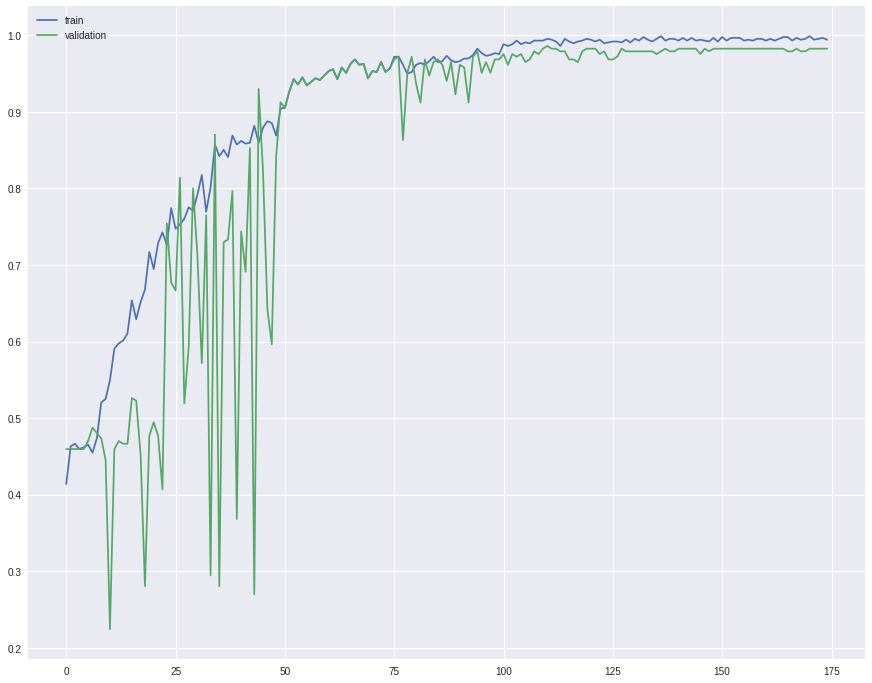

In [186]:
plt.figure(figsize=(15,12))
plt.plot(acc)
plt.plot(val_acc,)
plt.legend(["train","validation"])
#acc[-10:].mean()
#val_acc[-10:].mean()

#plt.plot(SimpleNet_history.history["acc"])
#plt.plot(SimpleNet_history.history["val_acc"])

In [187]:
print("train accuracy average last 15 results :",acc[-15:].mean())
print("train standard deviation last 15 results :",acc[-15:].std())
print("train accuracy average last 15 results :",val_acc[-15:].mean())
print("train standard deviation last 15 results :",val_acc[-15:].std())

train accuracy average last 15 results : 0.9953216374454907
train standard deviation last 15 results : 0.0017608717145912558
train accuracy average last 15 results : 0.9815204668602748
train standard deviation last 15 results : 0.0015516369609844356


**Parameters Search**

In [0]:
# for batch size
a={}

for i in[16,32,64,128]:
  num_classes=5
  model=create_model()
  opt_add=keras.optimizers.Adadelta()
  model.compile(optimizer=opt_add,loss="categorical_crossentropy",
                metrics=["accuracy"])
  print("batch size:",i,"start...")

  SimpleNet_history = model.fit_generator(
        train_datagen.flow(x_tr,y_tr,batch_size=i),
        steps_per_epoch=len(x_tr)/i,
        epochs=200,
        validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
        validation_steps=len(x_ts)/128,verbose=0)
  a["{}".format(i)]=SimpleNet_history.history
  print("end i batch size model")
  